In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

cust_df = pd.read_csv("../data/santander_train.csv", encoding='latin-1')
print('shape:', cust_df.shape)
cust_df.head()

shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
print(unsatisfied_cnt)

3008


In [5]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [6]:
total_cnt = cust_df.TARGET.count()
total_cnt

76020

In [7]:
cust_df.shape[0]

76020

In [8]:
unsatisfied_cnt / total_cnt

0.0395685345961589

In [9]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [11]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

x_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print(f' x_features shape: {x_features.shape}')

 x_features shape: (76020, 369)


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, 
                                                    test_size=0.2, stratify=y_labels)
train_cnt = y_train.count()
test_cnt = y_test.count()

In [13]:
y_train.value_counts()

0    58410
1     2406
Name: TARGET, dtype: int64

In [14]:
y_train.value_counts() / train_cnt

0    0.960438
1    0.039562
Name: TARGET, dtype: float64

In [15]:
y_test.value_counts() / test_cnt

0    0.960405
1    0.039595
Name: TARGET, dtype: float64

In [16]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, 
                                            test_size=0.3)

XGBoost

In [17]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, 
                        n_jobs=-1, random_state=156)
xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=100, 
            eval_metric='auc', eval_set=[(x_tr, y_tr), (x_val, y_val)])

[0]	validation_0-auc:0.80089	validation_1-auc:0.795074
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.804904	validation_1-auc:0.79871
[2]	validation_0-auc:0.806535	validation_1-auc:0.800584
[3]	validation_0-auc:0.809559	validation_1-auc:0.802936
[4]	validation_0-auc:0.815612	validation_1-auc:0.805735
[5]	validation_0-auc:0.812637	validation_1-auc:0.806127
[6]	validation_0-auc:0.812981	validation_1-auc:0.806514
[7]	validation_0-auc:0.819515	validation_1-auc:0.809271
[8]	validation_0-auc:0.820183	validation_1-auc:0.80935
[9]	validation_0-auc:0.820023	validation_1-auc:0.80926
[10]	validation_0-auc:0.819402	validation_1-auc:0.808748
[11]	validation_0-auc:0.820073	validation_1-auc:0.809444
[12]	validation_0-auc:0.820498	validation_1-auc:0.809908
[13]	validation_0-auc:0.820359	validation_1-auc:0.80973
[14]	validation_0-auc:0.820341	validation_1-auc:0.809655
[1

[141]	validation_0-auc:0.853951	validation_1-auc:0.831661
[142]	validation_0-auc:0.854036	validation_1-auc:0.831708
[143]	validation_0-auc:0.854243	validation_1-auc:0.831731
[144]	validation_0-auc:0.85433	validation_1-auc:0.831845
[145]	validation_0-auc:0.854441	validation_1-auc:0.831983
[146]	validation_0-auc:0.854668	validation_1-auc:0.832152
[147]	validation_0-auc:0.854817	validation_1-auc:0.832147
[148]	validation_0-auc:0.854968	validation_1-auc:0.832167
[149]	validation_0-auc:0.855113	validation_1-auc:0.832312
[150]	validation_0-auc:0.855176	validation_1-auc:0.832336
[151]	validation_0-auc:0.855252	validation_1-auc:0.832398
[152]	validation_0-auc:0.855325	validation_1-auc:0.8324
[153]	validation_0-auc:0.855554	validation_1-auc:0.832472
[154]	validation_0-auc:0.85568	validation_1-auc:0.832589
[155]	validation_0-auc:0.855756	validation_1-auc:0.832609
[156]	validation_0-auc:0.855829	validation_1-auc:0.83261
[157]	validation_0-auc:0.85597	validation_1-auc:0.832623
[158]	validation_0-a

[283]	validation_0-auc:0.867356	validation_1-auc:0.834133
[284]	validation_0-auc:0.867427	validation_1-auc:0.83411
[285]	validation_0-auc:0.867426	validation_1-auc:0.834129
[286]	validation_0-auc:0.867479	validation_1-auc:0.834109
[287]	validation_0-auc:0.867513	validation_1-auc:0.834086
[288]	validation_0-auc:0.867638	validation_1-auc:0.834137
[289]	validation_0-auc:0.867696	validation_1-auc:0.834155
[290]	validation_0-auc:0.867874	validation_1-auc:0.834063
[291]	validation_0-auc:0.86789	validation_1-auc:0.834083
[292]	validation_0-auc:0.868002	validation_1-auc:0.834112
[293]	validation_0-auc:0.868064	validation_1-auc:0.834062
[294]	validation_0-auc:0.868124	validation_1-auc:0.834033
[295]	validation_0-auc:0.868162	validation_1-auc:0.834042
[296]	validation_0-auc:0.868209	validation_1-auc:0.834023
[297]	validation_0-auc:0.868296	validation_1-auc:0.833996
[298]	validation_0-auc:0.868391	validation_1-auc:0.833962
[299]	validation_0-auc:0.868433	validation_1-auc:0.833964
[300]	validation

XGBClassifier(learning_rate=0.05, n_estimators=500, n_jobs=-1, random_state=156)

In [18]:
from sklearn.metrics import roc_auc_score

pred_proba = xgb_clf.predict_proba(x_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC Score: {xgb_roc_score:.4f}')

ROC AUC Score: 0.8401


In [19]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
}

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score


def objective_func(search_space):
    
    params = {
        'n_estimators': 100,  
        'max_depth': int(search_space['max_depth']),
        'min_child_weight': int(search_space['min_child_weight']),
        'colsample_bytree': search_space['colsample_bytree'],
        'learning_rate': search_space['learning_rate'],  
    }

    xgb_clf = XGBClassifier(**params, n_jobs=-1)
    roc_auc_list = []
    
    kf = KFold(n_splits=3)
    
    for tr_index, val_index in kf.split(x_train):
        x_tr, y_tr = x_train.iloc[tr_index], y_train.iloc[tr_index]
        x_val, y_val = x_train.iloc[val_index], y_train.iloc[val_index]
        xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=30, 
                    eval_metric='auc', eval_set=[(x_tr, y_tr), (x_val, y_val)])
        pred_proba = xgb_clf.predict_proba(x_val)[:, 1]
        score = roc_auc_score(y_val, pred_proba)
        roc_auc_list.append(score)
    
    return -1 * np.mean(roc_auc_list)

In [21]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, space=xgb_search_space, 
            algo=tpe.suggest, max_evals=50, trials=trials, 
            rstate=np.random.default_rng(seed=30))

[0]	validation_0-auc:0.816252	validation_1-auc:0.807524                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.824883	validation_1-auc:0.81844                                                                 

[2]	validation_0-auc:0.829494	validation_1-auc:0.821137                                                                

[3]	validation_0-auc:0.82906	validation_1-auc:0.818219                                                                 

[4]	validation_0-auc:0.830658	validation_1-auc:0.821652                                                                

[5]	validation_0-auc:0.83529	validation_1-auc:0.821824                                                                 

[6]	validation_0-auc:0.836796	v

[65]	validation_0-auc:0.891614	validation_1-auc:0.843022                                                               

[66]	validation_0-auc:0.891887	validation_1-auc:0.842861                                                               

[67]	validation_0-auc:0.892438	validation_1-auc:0.842765                                                               

[68]	validation_0-auc:0.892745	validation_1-auc:0.842822                                                               

[69]	validation_0-auc:0.892966	validation_1-auc:0.842461                                                               

[70]	validation_0-auc:0.893197	validation_1-auc:0.842401                                                               

[71]	validation_0-auc:0.893392	validation_1-auc:0.842268                                                               

[72]	validation_0-auc:0.893629	validation_1-auc:0.842403                                                               

[73]	validation_0-auc:0.8943	val

[34]	validation_0-auc:0.87428	validation_1-auc:0.829118                                                                

[35]	validation_0-auc:0.874936	validation_1-auc:0.829897                                                               

[36]	validation_0-auc:0.875775	validation_1-auc:0.830127                                                               

[37]	validation_0-auc:0.876476	validation_1-auc:0.830376                                                               

[38]	validation_0-auc:0.877624	validation_1-auc:0.83053                                                                

[39]	validation_0-auc:0.878335	validation_1-auc:0.830714                                                               

[40]	validation_0-auc:0.879146	validation_1-auc:0.831106                                                               

[41]	validation_0-auc:0.880321	validation_1-auc:0.83047                                                                

[42]	validation_0-auc:0.880904	v

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.827335	validation_1-auc:0.814621                                                                

[2]	validation_0-auc:0.833142	validation_1-auc:0.818504                                                                

[3]	validation_0-auc:0.839259	validation_1-auc:0.821582                                                                

[4]	validation_0-auc:0.838469	validation_1-auc:0.821528                                                                

[5]	validation_0-auc:0.842001	validation_1-auc:0.823695                                                                

[6]	validation_0-auc:0.844343	validation_1-auc:0.825345                                                                

[7]	validation_0-auc:0.845099	v

[66]	validation_0-auc:0.89175	validation_1-auc:0.8345                                                                  

[67]	validation_0-auc:0.892079	validation_1-auc:0.834629                                                               

[68]	validation_0-auc:0.892354	validation_1-auc:0.834677                                                               

[69]	validation_0-auc:0.892514	validation_1-auc:0.834617                                                               

[70]	validation_0-auc:0.892775	validation_1-auc:0.834522                                                               

[71]	validation_0-auc:0.893108	validation_1-auc:0.834456                                                               

[72]	validation_0-auc:0.893423	validation_1-auc:0.834334                                                               

[73]	validation_0-auc:0.893681	validation_1-auc:0.83444                                                                

[74]	validation_0-auc:0.894168	v

[42]	validation_0-auc:0.894893	validation_1-auc:0.833742                                                               

[43]	validation_0-auc:0.89582	validation_1-auc:0.832893                                                                

[44]	validation_0-auc:0.897923	validation_1-auc:0.834022                                                               

[45]	validation_0-auc:0.898524	validation_1-auc:0.833571                                                               

[46]	validation_0-auc:0.900316	validation_1-auc:0.834821                                                               

[47]	validation_0-auc:0.901085	validation_1-auc:0.83606                                                                

[48]	validation_0-auc:0.901541	validation_1-auc:0.835313                                                               

[49]	validation_0-auc:0.902419	validation_1-auc:0.834595                                                               

[50]	validation_0-auc:0.902551	v

[7]	validation_0-auc:0.854139	validation_1-auc:0.809976                                                                

[8]	validation_0-auc:0.858423	validation_1-auc:0.811346                                                                

[9]	validation_0-auc:0.86155	validation_1-auc:0.81181                                                                  

[10]	validation_0-auc:0.864488	validation_1-auc:0.814939                                                               

[11]	validation_0-auc:0.8662	validation_1-auc:0.815912                                                                 

[12]	validation_0-auc:0.867153	validation_1-auc:0.816772                                                               

[13]	validation_0-auc:0.868578	validation_1-auc:0.8161                                                                 

[14]	validation_0-auc:0.869654	validation_1-auc:0.81665                                                                

[15]	validation_0-auc:0.870628	v

[20]	validation_0-auc:0.873957	validation_1-auc:0.824419                                                               

[21]	validation_0-auc:0.874725	validation_1-auc:0.823601                                                               

[22]	validation_0-auc:0.874351	validation_1-auc:0.822646                                                               

[23]	validation_0-auc:0.876665	validation_1-auc:0.823679                                                               

[24]	validation_0-auc:0.877762	validation_1-auc:0.825275                                                               

[25]	validation_0-auc:0.878963	validation_1-auc:0.824579                                                               

[26]	validation_0-auc:0.879694	validation_1-auc:0.823835                                                               

[27]	validation_0-auc:0.880744	validation_1-auc:0.824481                                                               

[28]	validation_0-auc:0.883494	v

[35]	validation_0-auc:0.932871	validation_1-auc:0.838241                                                               

[36]	validation_0-auc:0.933789	validation_1-auc:0.838191                                                               

[37]	validation_0-auc:0.934675	validation_1-auc:0.837721                                                               

[38]	validation_0-auc:0.935233	validation_1-auc:0.837538                                                               

[39]	validation_0-auc:0.936368	validation_1-auc:0.837798                                                               

[40]	validation_0-auc:0.937864	validation_1-auc:0.837338                                                               

[41]	validation_0-auc:0.93859	validation_1-auc:0.837069                                                                

[42]	validation_0-auc:0.939076	validation_1-auc:0.837261                                                               

[43]	validation_0-auc:0.939319	v

[44]	validation_0-auc:0.945078	validation_1-auc:0.82395                                                                

[45]	validation_0-auc:0.945424	validation_1-auc:0.823814                                                               

[46]	validation_0-auc:0.945875	validation_1-auc:0.823777                                                               

Stopping. Best iteration:                                                                                              
[16]	validation_0-auc:0.899629	validation_1-auc:0.826399


[0]	validation_0-auc:0.831044	validation_1-auc:0.814224                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.834973	validation_1-auc:0.814766                                       

[61]	validation_0-auc:0.94355	validation_1-auc:0.829747                                                                

[62]	validation_0-auc:0.944328	validation_1-auc:0.829609                                                               

[63]	validation_0-auc:0.944566	validation_1-auc:0.829451                                                               

[64]	validation_0-auc:0.945151	validation_1-auc:0.829383                                                               

[65]	validation_0-auc:0.945519	validation_1-auc:0.829357                                                               

[66]	validation_0-auc:0.945856	validation_1-auc:0.829225                                                               

[67]	validation_0-auc:0.946074	validation_1-auc:0.829484                                                               

[68]	validation_0-auc:0.946109	validation_1-auc:0.829538                                                               

[69]	validation_0-auc:0.946381	v

Stopping. Best iteration:                                                                                              
[19]	validation_0-auc:0.869498	validation_1-auc:0.840215


[0]	validation_0-auc:0.755725	validation_1-auc:0.74389                                                                 

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.829382	validation_1-auc:0.801985                                                                

[2]	validation_0-auc:0.835323	validation_1-auc:0.803645                                                                

[3]	validation_0-auc:0.845086	validation_1-auc:0.810368                                                                

[4]	validation_0-auc:0.846458	validation_1-auc:0.811154                                       

[11]	validation_0-auc:0.85975	validation_1-auc:0.824504                                                                

[12]	validation_0-auc:0.861353	validation_1-auc:0.825721                                                               

[13]	validation_0-auc:0.862232	validation_1-auc:0.824565                                                               

[14]	validation_0-auc:0.864497	validation_1-auc:0.825154                                                               

[15]	validation_0-auc:0.865501	validation_1-auc:0.825531                                                               

[16]	validation_0-auc:0.86725	validation_1-auc:0.826065                                                                

[17]	validation_0-auc:0.869804	validation_1-auc:0.827587                                                               

[18]	validation_0-auc:0.870633	validation_1-auc:0.827922                                                               

[19]	validation_0-auc:0.871005	v

[19]	validation_0-auc:0.921226	validation_1-auc:0.838988                                                               

[20]	validation_0-auc:0.924923	validation_1-auc:0.838057                                                               

[21]	validation_0-auc:0.928645	validation_1-auc:0.836924                                                               

[22]	validation_0-auc:0.930613	validation_1-auc:0.836565                                                               

[23]	validation_0-auc:0.932468	validation_1-auc:0.836904                                                               

[24]	validation_0-auc:0.9332	validation_1-auc:0.836983                                                                 

[25]	validation_0-auc:0.935129	validation_1-auc:0.836729                                                               

[26]	validation_0-auc:0.93756	validation_1-auc:0.83671                                                                 

[27]	validation_0-auc:0.939164	v

[33]	validation_0-auc:0.95008	validation_1-auc:0.821954                                                                

[34]	validation_0-auc:0.951048	validation_1-auc:0.821553                                                               

[35]	validation_0-auc:0.951699	validation_1-auc:0.822078                                                               

[36]	validation_0-auc:0.952366	validation_1-auc:0.822619                                                               

[37]	validation_0-auc:0.953474	validation_1-auc:0.822956                                                               

[38]	validation_0-auc:0.953834	validation_1-auc:0.823338                                                               

[39]	validation_0-auc:0.954527	validation_1-auc:0.824056                                                               

[40]	validation_0-auc:0.955196	validation_1-auc:0.824225                                                               

[41]	validation_0-auc:0.955377	v

[6]	validation_0-auc:0.842269	validation_1-auc:0.832748                                                                

[7]	validation_0-auc:0.847276	validation_1-auc:0.834037                                                                

[8]	validation_0-auc:0.849038	validation_1-auc:0.834935                                                                

[9]	validation_0-auc:0.852881	validation_1-auc:0.836348                                                                

[10]	validation_0-auc:0.854027	validation_1-auc:0.837129                                                               

[11]	validation_0-auc:0.855955	validation_1-auc:0.837543                                                               

[12]	validation_0-auc:0.857823	validation_1-auc:0.837253                                                               

[13]	validation_0-auc:0.858802	validation_1-auc:0.839453                                                               

[14]	validation_0-auc:0.860232	v

[73]	validation_0-auc:0.901853	validation_1-auc:0.845471                                                               

[74]	validation_0-auc:0.901904	validation_1-auc:0.845416                                                               

[75]	validation_0-auc:0.902187	validation_1-auc:0.845385                                                               

[76]	validation_0-auc:0.902521	validation_1-auc:0.845469                                                               

[77]	validation_0-auc:0.902612	validation_1-auc:0.84538                                                                

[78]	validation_0-auc:0.902913	validation_1-auc:0.845367                                                               

[79]	validation_0-auc:0.903641	validation_1-auc:0.845265                                                               

[80]	validation_0-auc:0.903788	validation_1-auc:0.845199                                                               

[81]	validation_0-auc:0.904199	v

[38]	validation_0-auc:0.887157	validation_1-auc:0.830527                                                               

[39]	validation_0-auc:0.88828	validation_1-auc:0.830588                                                                

[40]	validation_0-auc:0.88924	validation_1-auc:0.830224                                                                

[41]	validation_0-auc:0.889882	validation_1-auc:0.829813                                                               

[42]	validation_0-auc:0.891118	validation_1-auc:0.830073                                                               

[43]	validation_0-auc:0.891575	validation_1-auc:0.829523                                                               

[44]	validation_0-auc:0.892591	validation_1-auc:0.830084                                                               

[45]	validation_0-auc:0.892898	validation_1-auc:0.830019                                                               

[46]	validation_0-auc:0.893572	v

[32]	validation_0-auc:0.879647	validation_1-auc:0.831717                                                               

[33]	validation_0-auc:0.880311	validation_1-auc:0.831103                                                               

[34]	validation_0-auc:0.881999	validation_1-auc:0.831917                                                               

[35]	validation_0-auc:0.883508	validation_1-auc:0.832247                                                               

[36]	validation_0-auc:0.884542	validation_1-auc:0.832912                                                               

[37]	validation_0-auc:0.885137	validation_1-auc:0.833377                                                               

[38]	validation_0-auc:0.885716	validation_1-auc:0.83408                                                                

[39]	validation_0-auc:0.886537	validation_1-auc:0.834033                                                               

[40]	validation_0-auc:0.887195	v

[2]	validation_0-auc:0.830107	validation_1-auc:0.827126                                                                

[3]	validation_0-auc:0.838435	validation_1-auc:0.831663                                                                

[4]	validation_0-auc:0.840352	validation_1-auc:0.833897                                                                

[5]	validation_0-auc:0.839947	validation_1-auc:0.829353                                                                

[6]	validation_0-auc:0.846203	validation_1-auc:0.832686                                                                

[7]	validation_0-auc:0.849662	validation_1-auc:0.83365                                                                 

[8]	validation_0-auc:0.853858	validation_1-auc:0.834457                                                                

[9]	validation_0-auc:0.858181	validation_1-auc:0.837078                                                                

[10]	validation_0-auc:0.859391	v

[8]	validation_0-auc:0.854313	validation_1-auc:0.819318                                                                

[9]	validation_0-auc:0.859739	validation_1-auc:0.822734                                                                

[10]	validation_0-auc:0.86055	validation_1-auc:0.823294                                                                

[11]	validation_0-auc:0.862495	validation_1-auc:0.824029                                                               

[12]	validation_0-auc:0.864251	validation_1-auc:0.825432                                                               

[13]	validation_0-auc:0.86586	validation_1-auc:0.824694                                                                

[14]	validation_0-auc:0.867436	validation_1-auc:0.822899                                                               

[15]	validation_0-auc:0.869689	validation_1-auc:0.8249                                                                 

[16]	validation_0-auc:0.871728	v

[75]	validation_0-auc:0.914615	validation_1-auc:0.829674                                                               

[76]	validation_0-auc:0.914971	validation_1-auc:0.829719                                                               

[77]	validation_0-auc:0.916351	validation_1-auc:0.829845                                                               

[78]	validation_0-auc:0.916561	validation_1-auc:0.829731                                                               

[79]	validation_0-auc:0.917089	validation_1-auc:0.829504                                                               

[80]	validation_0-auc:0.917204	validation_1-auc:0.829506                                                               

[81]	validation_0-auc:0.917497	validation_1-auc:0.829231                                                               

[82]	validation_0-auc:0.918013	validation_1-auc:0.829294                                                               

[83]	validation_0-auc:0.919065	v

[51]	validation_0-auc:0.900786	validation_1-auc:0.834246                                                               

[52]	validation_0-auc:0.901067	validation_1-auc:0.834912                                                               

[53]	validation_0-auc:0.901358	validation_1-auc:0.835193                                                               

[54]	validation_0-auc:0.901825	validation_1-auc:0.835114                                                               

[55]	validation_0-auc:0.901944	validation_1-auc:0.834839                                                               

[56]	validation_0-auc:0.902512	validation_1-auc:0.83486                                                                

[57]	validation_0-auc:0.902966	validation_1-auc:0.83514                                                                

[58]	validation_0-auc:0.903226	validation_1-auc:0.834958                                                               

[59]	validation_0-auc:0.903384	v

[22]	validation_0-auc:0.887238	validation_1-auc:0.838188                                                               

[23]	validation_0-auc:0.887892	validation_1-auc:0.838114                                                               

[24]	validation_0-auc:0.888139	validation_1-auc:0.838117                                                               

[25]	validation_0-auc:0.891213	validation_1-auc:0.839311                                                               

[26]	validation_0-auc:0.89423	validation_1-auc:0.839986                                                                

[27]	validation_0-auc:0.89633	validation_1-auc:0.840181                                                                

[28]	validation_0-auc:0.89915	validation_1-auc:0.84018                                                                 

[29]	validation_0-auc:0.900194	validation_1-auc:0.840301                                                               

[30]	validation_0-auc:0.901635	v

[24]	validation_0-auc:0.895642	validation_1-auc:0.823755                                                               

[25]	validation_0-auc:0.897469	validation_1-auc:0.824042                                                               

[26]	validation_0-auc:0.899116	validation_1-auc:0.82475                                                                

[27]	validation_0-auc:0.90033	validation_1-auc:0.824666                                                                

[28]	validation_0-auc:0.901714	validation_1-auc:0.824901                                                               

[29]	validation_0-auc:0.903103	validation_1-auc:0.824985                                                               

[30]	validation_0-auc:0.904897	validation_1-auc:0.824741                                                               

[31]	validation_0-auc:0.905853	validation_1-auc:0.825459                                                               

[32]	validation_0-auc:0.907086	v

[91]	validation_0-auc:0.946286	validation_1-auc:0.825771                                                               

[92]	validation_0-auc:0.94658	validation_1-auc:0.825712                                                                

[93]	validation_0-auc:0.94672	validation_1-auc:0.825674                                                                

[94]	validation_0-auc:0.946851	validation_1-auc:0.825715                                                               

Stopping. Best iteration:                                                                                              
[64]	validation_0-auc:0.936337	validation_1-auc:0.826723


[0]	validation_0-auc:0.829612	validation_1-auc:0.812277                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                               

[60]	validation_0-auc:0.929418	validation_1-auc:0.829208                                                               

[61]	validation_0-auc:0.929788	validation_1-auc:0.829527                                                               

[62]	validation_0-auc:0.930141	validation_1-auc:0.829865                                                               

[63]	validation_0-auc:0.930753	validation_1-auc:0.829956                                                               

[64]	validation_0-auc:0.930943	validation_1-auc:0.829779                                                               

[65]	validation_0-auc:0.93153	validation_1-auc:0.82973                                                                 

[66]	validation_0-auc:0.931884	validation_1-auc:0.829824                                                               

[67]	validation_0-auc:0.932399	validation_1-auc:0.829867                                                               

[68]	validation_0-auc:0.932743	v

[24]	validation_0-auc:0.870508	validation_1-auc:0.842983                                                               

[25]	validation_0-auc:0.871755	validation_1-auc:0.843152                                                               

[26]	validation_0-auc:0.873072	validation_1-auc:0.8433                                                                 

[27]	validation_0-auc:0.874306	validation_1-auc:0.843223                                                               

[28]	validation_0-auc:0.875487	validation_1-auc:0.842981                                                               

[29]	validation_0-auc:0.877281	validation_1-auc:0.843205                                                               

[30]	validation_0-auc:0.878327	validation_1-auc:0.843164                                                               

[31]	validation_0-auc:0.879615	validation_1-auc:0.843325                                                               

[32]	validation_0-auc:0.880546	v

[14]	validation_0-auc:0.863845	validation_1-auc:0.824398                                                               

[15]	validation_0-auc:0.865047	validation_1-auc:0.825034                                                               

[16]	validation_0-auc:0.866284	validation_1-auc:0.825647                                                               

[17]	validation_0-auc:0.86779	validation_1-auc:0.826199                                                                

[18]	validation_0-auc:0.868563	validation_1-auc:0.826217                                                               

[19]	validation_0-auc:0.869585	validation_1-auc:0.827507                                                               

[20]	validation_0-auc:0.870479	validation_1-auc:0.82809                                                                

[21]	validation_0-auc:0.871272	validation_1-auc:0.827967                                                               

[22]	validation_0-auc:0.872077	v

[8]	validation_0-auc:0.847252	validation_1-auc:0.826163                                                                

[9]	validation_0-auc:0.84833	validation_1-auc:0.826467                                                                 

[10]	validation_0-auc:0.849358	validation_1-auc:0.827411                                                               

[11]	validation_0-auc:0.853482	validation_1-auc:0.829193                                                               

[12]	validation_0-auc:0.855315	validation_1-auc:0.829093                                                               

[13]	validation_0-auc:0.858431	validation_1-auc:0.830471                                                               

[14]	validation_0-auc:0.861857	validation_1-auc:0.830447                                                               

[15]	validation_0-auc:0.863308	validation_1-auc:0.830737                                                               

[16]	validation_0-auc:0.864062	v

[75]	validation_0-auc:0.903201	validation_1-auc:0.831739                                                               

[76]	validation_0-auc:0.903496	validation_1-auc:0.831612                                                               

[77]	validation_0-auc:0.903699	validation_1-auc:0.831608                                                               

[78]	validation_0-auc:0.903868	validation_1-auc:0.831571                                                               

[79]	validation_0-auc:0.904062	validation_1-auc:0.831408                                                               

[80]	validation_0-auc:0.904555	validation_1-auc:0.831095                                                               

Stopping. Best iteration:                                                                                              
[50]	validation_0-auc:0.892796	validation_1-auc:0.836209


[0]	validation_0-auc:0.822916	validation_1-auc:0.804753                                        

[0]	validation_0-auc:0.833453	validation_1-auc:0.801699                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.839837	validation_1-auc:0.805488                                                                

[2]	validation_0-auc:0.851399	validation_1-auc:0.812623                                                                

[3]	validation_0-auc:0.857445	validation_1-auc:0.814354                                                                

[4]	validation_0-auc:0.862877	validation_1-auc:0.815179                                                                

[5]	validation_0-auc:0.86527	validation_1-auc:0.818022                                                                 

[6]	validation_0-auc:0.868534	v

[65]	validation_0-auc:0.958067	validation_1-auc:0.82392                                                                

[66]	validation_0-auc:0.958114	validation_1-auc:0.82386                                                                

[67]	validation_0-auc:0.958266	validation_1-auc:0.823731                                                               

[68]	validation_0-auc:0.958409	validation_1-auc:0.823679                                                               

[69]	validation_0-auc:0.958445	validation_1-auc:0.823742                                                               

[70]	validation_0-auc:0.958498	validation_1-auc:0.823724                                                               

[71]	validation_0-auc:0.958582	validation_1-auc:0.823439                                                               

[72]	validation_0-auc:0.958693	validation_1-auc:0.823616                                                               

[73]	validation_0-auc:0.95878	va

[47]	validation_0-auc:0.951187	validation_1-auc:0.826398                                                               

[48]	validation_0-auc:0.951522	validation_1-auc:0.82666                                                                

[49]	validation_0-auc:0.951776	validation_1-auc:0.826436                                                               

[50]	validation_0-auc:0.951959	validation_1-auc:0.826148                                                               

[51]	validation_0-auc:0.952153	validation_1-auc:0.826157                                                               

Stopping. Best iteration:                                                                                              
[21]	validation_0-auc:0.923221	validation_1-auc:0.829247


[0]	validation_0-auc:0.824425	validation_1-auc:0.806834                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.    

[59]	validation_0-auc:0.901012	validation_1-auc:0.837238                                                               

[60]	validation_0-auc:0.901779	validation_1-auc:0.837822                                                               

[61]	validation_0-auc:0.902081	validation_1-auc:0.838088                                                               

[62]	validation_0-auc:0.902366	validation_1-auc:0.838132                                                               

[63]	validation_0-auc:0.90381	validation_1-auc:0.838443                                                                

[64]	validation_0-auc:0.904224	validation_1-auc:0.838534                                                               

[65]	validation_0-auc:0.904686	validation_1-auc:0.838461                                                               

[66]	validation_0-auc:0.905142	validation_1-auc:0.838172                                                               

Stopping. Best iteration:       

[56]	validation_0-auc:0.900666	validation_1-auc:0.819705                                                               

[57]	validation_0-auc:0.901984	validation_1-auc:0.819483                                                               

[58]	validation_0-auc:0.902107	validation_1-auc:0.818788                                                               

[59]	validation_0-auc:0.902675	validation_1-auc:0.819319                                                               

[60]	validation_0-auc:0.904131	validation_1-auc:0.819333                                                               

[61]	validation_0-auc:0.9045	validation_1-auc:0.819474                                                                 

[62]	validation_0-auc:0.905214	validation_1-auc:0.819771                                                               

[63]	validation_0-auc:0.906276	validation_1-auc:0.819915                                                               

[64]	validation_0-auc:0.906981	v

[51]	validation_0-auc:0.895276	validation_1-auc:0.823893                                                               

[52]	validation_0-auc:0.896785	validation_1-auc:0.824614                                                               

[53]	validation_0-auc:0.896998	validation_1-auc:0.824774                                                               

[54]	validation_0-auc:0.897561	validation_1-auc:0.825032                                                               

[55]	validation_0-auc:0.898277	validation_1-auc:0.824794                                                               

[56]	validation_0-auc:0.898813	validation_1-auc:0.825015                                                               

[57]	validation_0-auc:0.899902	validation_1-auc:0.825482                                                               

[58]	validation_0-auc:0.900476	validation_1-auc:0.824899                                                               

Stopping. Best iteration:       

[10]	validation_0-auc:0.890374	validation_1-auc:0.819672                                                               

[11]	validation_0-auc:0.897422	validation_1-auc:0.821572                                                               

[12]	validation_0-auc:0.902041	validation_1-auc:0.822756                                                               

[13]	validation_0-auc:0.910043	validation_1-auc:0.82044                                                                

[14]	validation_0-auc:0.914748	validation_1-auc:0.821948                                                               

[15]	validation_0-auc:0.91858	validation_1-auc:0.822309                                                                

[16]	validation_0-auc:0.921837	validation_1-auc:0.823018                                                               

[17]	validation_0-auc:0.927024	validation_1-auc:0.822701                                                               

[18]	validation_0-auc:0.931016	v

[27]	validation_0-auc:0.947214	validation_1-auc:0.823403                                                               

[28]	validation_0-auc:0.949024	validation_1-auc:0.823778                                                               

[29]	validation_0-auc:0.950898	validation_1-auc:0.824436                                                               

[30]	validation_0-auc:0.951867	validation_1-auc:0.824532                                                               

[31]	validation_0-auc:0.95306	validation_1-auc:0.823308                                                                

[32]	validation_0-auc:0.954644	validation_1-auc:0.823212                                                               

[33]	validation_0-auc:0.955813	validation_1-auc:0.823179                                                               

[34]	validation_0-auc:0.956892	validation_1-auc:0.822875                                                               

[35]	validation_0-auc:0.958284	v

[39]	validation_0-auc:0.868088	validation_1-auc:0.838934                                                               

[40]	validation_0-auc:0.868128	validation_1-auc:0.838728                                                               

[41]	validation_0-auc:0.867699	validation_1-auc:0.837919                                                               

[42]	validation_0-auc:0.868148	validation_1-auc:0.83858                                                                

[43]	validation_0-auc:0.867871	validation_1-auc:0.838224                                                               

[44]	validation_0-auc:0.868682	validation_1-auc:0.838637                                                               

[45]	validation_0-auc:0.869319	validation_1-auc:0.837848                                                               

[46]	validation_0-auc:0.870067	validation_1-auc:0.83811                                                                

[47]	validation_0-auc:0.870697	v

[4]	validation_0-auc:0.838637	validation_1-auc:0.81172                                                                 

[5]	validation_0-auc:0.839802	validation_1-auc:0.808739                                                                

[6]	validation_0-auc:0.84247	validation_1-auc:0.809573                                                                 

[7]	validation_0-auc:0.843245	validation_1-auc:0.809764                                                                

[8]	validation_0-auc:0.844983	validation_1-auc:0.81102                                                                 

[9]	validation_0-auc:0.847877	validation_1-auc:0.814266                                                                

[10]	validation_0-auc:0.848225	validation_1-auc:0.814543                                                               

[11]	validation_0-auc:0.849489	validation_1-auc:0.814462                                                               

[12]	validation_0-auc:0.851178	v

[71]	validation_0-auc:0.884108	validation_1-auc:0.827257                                                               

[72]	validation_0-auc:0.884413	validation_1-auc:0.827069                                                               

[73]	validation_0-auc:0.884676	validation_1-auc:0.826771                                                               

[74]	validation_0-auc:0.885066	validation_1-auc:0.827099                                                               

[75]	validation_0-auc:0.885698	validation_1-auc:0.827443                                                               

[76]	validation_0-auc:0.886452	validation_1-auc:0.827907                                                               

[77]	validation_0-auc:0.886959	validation_1-auc:0.828059                                                               

[78]	validation_0-auc:0.887318	validation_1-auc:0.828                                                                  

[79]	validation_0-auc:0.887872	v

[36]	validation_0-auc:0.8645	validation_1-auc:0.827923                                                                 

[37]	validation_0-auc:0.864876	validation_1-auc:0.828166                                                               

[38]	validation_0-auc:0.865462	validation_1-auc:0.827816                                                               

[39]	validation_0-auc:0.865885	validation_1-auc:0.827396                                                               

[40]	validation_0-auc:0.866703	validation_1-auc:0.826909                                                               

[41]	validation_0-auc:0.866601	validation_1-auc:0.826123                                                               

[42]	validation_0-auc:0.867268	validation_1-auc:0.826689                                                               

[43]	validation_0-auc:0.867436	validation_1-auc:0.826341                                                               

[44]	validation_0-auc:0.868745	v

[1]	validation_0-auc:0.830951	validation_1-auc:0.817357                                                                

[2]	validation_0-auc:0.832145	validation_1-auc:0.817385                                                                

[3]	validation_0-auc:0.838462	validation_1-auc:0.822577                                                                

[4]	validation_0-auc:0.840299	validation_1-auc:0.825698                                                                

[5]	validation_0-auc:0.84225	validation_1-auc:0.82548                                                                  

[6]	validation_0-auc:0.845217	validation_1-auc:0.828389                                                                

[7]	validation_0-auc:0.849188	validation_1-auc:0.829861                                                                

[8]	validation_0-auc:0.850237	validation_1-auc:0.830666                                                                

[9]	validation_0-auc:0.851223	va

[12]	validation_0-auc:0.857259	validation_1-auc:0.812535                                                               

[13]	validation_0-auc:0.86366	validation_1-auc:0.817182                                                                

[14]	validation_0-auc:0.864247	validation_1-auc:0.816927                                                               

[15]	validation_0-auc:0.864974	validation_1-auc:0.817578                                                               

[16]	validation_0-auc:0.86574	validation_1-auc:0.818376                                                                

[17]	validation_0-auc:0.866622	validation_1-auc:0.81816                                                                

[18]	validation_0-auc:0.867246	validation_1-auc:0.818477                                                               

[19]	validation_0-auc:0.869546	validation_1-auc:0.818388                                                               

[20]	validation_0-auc:0.870795	v

[79]	validation_0-auc:0.9275	validation_1-auc:0.827579                                                                 

[80]	validation_0-auc:0.928109	validation_1-auc:0.827619                                                               

[81]	validation_0-auc:0.928654	validation_1-auc:0.827691                                                               

[82]	validation_0-auc:0.92921	validation_1-auc:0.82828                                                                 

[83]	validation_0-auc:0.929979	validation_1-auc:0.828403                                                               

[84]	validation_0-auc:0.930367	validation_1-auc:0.828588                                                               

[85]	validation_0-auc:0.930843	validation_1-auc:0.828737                                                               

[86]	validation_0-auc:0.931482	validation_1-auc:0.828637                                                               

[87]	validation_0-auc:0.931982	v

[44]	validation_0-auc:0.900226	validation_1-auc:0.828886                                                               

[45]	validation_0-auc:0.90099	validation_1-auc:0.828617                                                                

[46]	validation_0-auc:0.901803	validation_1-auc:0.828667                                                               

[47]	validation_0-auc:0.902573	validation_1-auc:0.828325                                                               

[48]	validation_0-auc:0.903122	validation_1-auc:0.828001                                                               

[49]	validation_0-auc:0.904178	validation_1-auc:0.828162                                                               

[50]	validation_0-auc:0.905158	validation_1-auc:0.828386                                                               

[51]	validation_0-auc:0.906163	validation_1-auc:0.828415                                                               

[52]	validation_0-auc:0.907088	v

[46]	validation_0-auc:0.871482	validation_1-auc:0.843835                                                               

[47]	validation_0-auc:0.872189	validation_1-auc:0.84417                                                                

[48]	validation_0-auc:0.87294	validation_1-auc:0.844091                                                                

[49]	validation_0-auc:0.872949	validation_1-auc:0.844362                                                               

[50]	validation_0-auc:0.873501	validation_1-auc:0.844262                                                               

[51]	validation_0-auc:0.874618	validation_1-auc:0.84473                                                                

[52]	validation_0-auc:0.875164	validation_1-auc:0.844962                                                               

[53]	validation_0-auc:0.875507	validation_1-auc:0.844949                                                               

[54]	validation_0-auc:0.875982	v

[11]	validation_0-auc:0.845497	validation_1-auc:0.818275                                                               

[12]	validation_0-auc:0.846728	validation_1-auc:0.818621                                                               

[13]	validation_0-auc:0.850516	validation_1-auc:0.819524                                                               

[14]	validation_0-auc:0.850763	validation_1-auc:0.819253                                                               

[15]	validation_0-auc:0.852586	validation_1-auc:0.819813                                                               

[16]	validation_0-auc:0.852686	validation_1-auc:0.819475                                                               

[17]	validation_0-auc:0.853928	validation_1-auc:0.820527                                                               

[18]	validation_0-auc:0.85477	validation_1-auc:0.821029                                                                

[19]	validation_0-auc:0.855747	v

[78]	validation_0-auc:0.88869	validation_1-auc:0.832061                                                                

[79]	validation_0-auc:0.889033	validation_1-auc:0.831836                                                               

[80]	validation_0-auc:0.889238	validation_1-auc:0.83179                                                                

[81]	validation_0-auc:0.889467	validation_1-auc:0.83175                                                                

[82]	validation_0-auc:0.889879	validation_1-auc:0.831916                                                               

[83]	validation_0-auc:0.889969	validation_1-auc:0.83192                                                                

[84]	validation_0-auc:0.890276	validation_1-auc:0.831931                                                               

[85]	validation_0-auc:0.890596	validation_1-auc:0.831904                                                               

[86]	validation_0-auc:0.890863	v

[44]	validation_0-auc:0.871706	validation_1-auc:0.833584                                                               

[45]	validation_0-auc:0.87241	validation_1-auc:0.833292                                                                

[46]	validation_0-auc:0.872944	validation_1-auc:0.833527                                                               

[47]	validation_0-auc:0.873386	validation_1-auc:0.833655                                                               

[48]	validation_0-auc:0.873681	validation_1-auc:0.833389                                                               

[49]	validation_0-auc:0.874197	validation_1-auc:0.833114                                                               

[50]	validation_0-auc:0.874465	validation_1-auc:0.832973                                                               

[51]	validation_0-auc:0.87527	validation_1-auc:0.833878                                                                

[52]	validation_0-auc:0.875995	v

[9]	validation_0-auc:0.885109	validation_1-auc:0.830505                                                                

[10]	validation_0-auc:0.888235	validation_1-auc:0.832041                                                               

[11]	validation_0-auc:0.894883	validation_1-auc:0.832978                                                               

[12]	validation_0-auc:0.898095	validation_1-auc:0.833324                                                               

[13]	validation_0-auc:0.899573	validation_1-auc:0.831706                                                               

[14]	validation_0-auc:0.90165	validation_1-auc:0.8291                                                                  

[15]	validation_0-auc:0.904734	validation_1-auc:0.830963                                                               

[16]	validation_0-auc:0.9104	validation_1-auc:0.832399                                                                 

[17]	validation_0-auc:0.91272	va

[22]	validation_0-auc:0.926791	validation_1-auc:0.818688                                                               

[23]	validation_0-auc:0.929149	validation_1-auc:0.82027                                                                

[24]	validation_0-auc:0.929649	validation_1-auc:0.821296                                                               

[25]	validation_0-auc:0.93228	validation_1-auc:0.820194                                                                

[26]	validation_0-auc:0.934559	validation_1-auc:0.819267                                                               

[27]	validation_0-auc:0.935353	validation_1-auc:0.820926                                                               

[28]	validation_0-auc:0.93809	validation_1-auc:0.82123                                                                 

[29]	validation_0-auc:0.939974	validation_1-auc:0.819657                                                               

[30]	validation_0-auc:0.940892	v

[37]	validation_0-auc:0.94465	validation_1-auc:0.825084                                                                

[38]	validation_0-auc:0.946105	validation_1-auc:0.823806                                                               

[39]	validation_0-auc:0.947347	validation_1-auc:0.823224                                                               

[40]	validation_0-auc:0.94792	validation_1-auc:0.822252                                                                

[41]	validation_0-auc:0.948726	validation_1-auc:0.821551                                                               

[42]	validation_0-auc:0.949259	validation_1-auc:0.822759                                                               

[43]	validation_0-auc:0.950431	validation_1-auc:0.821353                                                               

[44]	validation_0-auc:0.951348	validation_1-auc:0.822372                                                               

[45]	validation_0-auc:0.9516	val

[39]	validation_0-auc:0.879541	validation_1-auc:0.840573                                                               

[40]	validation_0-auc:0.880474	validation_1-auc:0.84076                                                                

[41]	validation_0-auc:0.881269	validation_1-auc:0.841117                                                               

[42]	validation_0-auc:0.882413	validation_1-auc:0.841351                                                               

[43]	validation_0-auc:0.883393	validation_1-auc:0.841569                                                               

[44]	validation_0-auc:0.884182	validation_1-auc:0.841553                                                               

[45]	validation_0-auc:0.88497	validation_1-auc:0.841176                                                                

[46]	validation_0-auc:0.885625	validation_1-auc:0.841186                                                               

[47]	validation_0-auc:0.886404	v

[4]	validation_0-auc:0.841661	validation_1-auc:0.812218                                                                

[5]	validation_0-auc:0.843153	validation_1-auc:0.81266                                                                 

[6]	validation_0-auc:0.84545	validation_1-auc:0.812895                                                                 

[7]	validation_0-auc:0.845893	validation_1-auc:0.812346                                                                

[8]	validation_0-auc:0.84838	validation_1-auc:0.813645                                                                 

[9]	validation_0-auc:0.849483	validation_1-auc:0.814618                                                                

[10]	validation_0-auc:0.850493	validation_1-auc:0.815572                                                               

[11]	validation_0-auc:0.851578	validation_1-auc:0.815832                                                               

[12]	validation_0-auc:0.852703	v

[71]	validation_0-auc:0.902694	validation_1-auc:0.829793                                                               

[72]	validation_0-auc:0.903342	validation_1-auc:0.829687                                                               

[73]	validation_0-auc:0.903479	validation_1-auc:0.829724                                                               

[74]	validation_0-auc:0.903844	validation_1-auc:0.82981                                                                

[75]	validation_0-auc:0.903989	validation_1-auc:0.829943                                                               

[76]	validation_0-auc:0.904352	validation_1-auc:0.829998                                                               

[77]	validation_0-auc:0.904544	validation_1-auc:0.829886                                                               

[78]	validation_0-auc:0.904943	validation_1-auc:0.830042                                                               

[79]	validation_0-auc:0.905034	v

[55]	validation_0-auc:0.891293	validation_1-auc:0.833637                                                               

[56]	validation_0-auc:0.892015	validation_1-auc:0.833825                                                               

[57]	validation_0-auc:0.892554	validation_1-auc:0.833936                                                               

[58]	validation_0-auc:0.892792	validation_1-auc:0.834028                                                               

[59]	validation_0-auc:0.893061	validation_1-auc:0.833889                                                               

[60]	validation_0-auc:0.893405	validation_1-auc:0.834311                                                               

[61]	validation_0-auc:0.893849	validation_1-auc:0.834325                                                               

[62]	validation_0-auc:0.894155	validation_1-auc:0.834311                                                               

[63]	validation_0-auc:0.894658	v

[20]	validation_0-auc:0.909749	validation_1-auc:0.832577                                                               

[21]	validation_0-auc:0.912129	validation_1-auc:0.832172                                                               

[22]	validation_0-auc:0.914473	validation_1-auc:0.833088                                                               

[23]	validation_0-auc:0.916964	validation_1-auc:0.834284                                                               

[24]	validation_0-auc:0.918799	validation_1-auc:0.834659                                                               

[25]	validation_0-auc:0.923365	validation_1-auc:0.83553                                                                

[26]	validation_0-auc:0.92564	validation_1-auc:0.835388                                                                

[27]	validation_0-auc:0.928405	validation_1-auc:0.835102                                                               

[28]	validation_0-auc:0.930305	v

[28]	validation_0-auc:0.937033	validation_1-auc:0.821991                                                               

[29]	validation_0-auc:0.939067	validation_1-auc:0.821765                                                               

[30]	validation_0-auc:0.941471	validation_1-auc:0.821759                                                               

[31]	validation_0-auc:0.942748	validation_1-auc:0.822181                                                               

[32]	validation_0-auc:0.944288	validation_1-auc:0.822595                                                               

[33]	validation_0-auc:0.945429	validation_1-auc:0.822453                                                               

[34]	validation_0-auc:0.946642	validation_1-auc:0.822195                                                               

[35]	validation_0-auc:0.947833	validation_1-auc:0.821437                                                               

[36]	validation_0-auc:0.949657	v

[44]	validation_0-auc:0.956817	validation_1-auc:0.824391                                                               

[45]	validation_0-auc:0.957422	validation_1-auc:0.824318                                                               

[46]	validation_0-auc:0.958233	validation_1-auc:0.824407                                                               

[47]	validation_0-auc:0.958989	validation_1-auc:0.824346                                                               

[48]	validation_0-auc:0.959669	validation_1-auc:0.824788                                                               

[49]	validation_0-auc:0.960542	validation_1-auc:0.825139                                                               

[50]	validation_0-auc:0.960962	validation_1-auc:0.824357                                                               

[51]	validation_0-auc:0.962071	validation_1-auc:0.824252                                                               

[52]	validation_0-auc:0.962452	v

[51]	validation_0-auc:0.92309	validation_1-auc:0.837018                                                                

[52]	validation_0-auc:0.923959	validation_1-auc:0.837318                                                               

[53]	validation_0-auc:0.924705	validation_1-auc:0.837094                                                               

[54]	validation_0-auc:0.925512	validation_1-auc:0.837068                                                               

[55]	validation_0-auc:0.926455	validation_1-auc:0.836746                                                               

[56]	validation_0-auc:0.927453	validation_1-auc:0.836322                                                               

[57]	validation_0-auc:0.928144	validation_1-auc:0.836457                                                               

[58]	validation_0-auc:0.928974	validation_1-auc:0.836251                                                               

[59]	validation_0-auc:0.929273	v

[54]	validation_0-auc:0.926335	validation_1-auc:0.826234                                                               

[55]	validation_0-auc:0.927634	validation_1-auc:0.82642                                                                

[56]	validation_0-auc:0.928393	validation_1-auc:0.826298                                                               

[57]	validation_0-auc:0.928968	validation_1-auc:0.826398                                                               

[58]	validation_0-auc:0.92977	validation_1-auc:0.826756                                                                

[59]	validation_0-auc:0.930482	validation_1-auc:0.826678                                                               

[60]	validation_0-auc:0.931312	validation_1-auc:0.826821                                                               

[61]	validation_0-auc:0.93174	validation_1-auc:0.827025                                                                

[62]	validation_0-auc:0.932377	v

[19]	validation_0-auc:0.878724	validation_1-auc:0.829461                                                               

[20]	validation_0-auc:0.879798	validation_1-auc:0.829288                                                               

[21]	validation_0-auc:0.88142	validation_1-auc:0.829187                                                                

[22]	validation_0-auc:0.883477	validation_1-auc:0.829993                                                               

[23]	validation_0-auc:0.885249	validation_1-auc:0.830333                                                               

[24]	validation_0-auc:0.887697	validation_1-auc:0.830103                                                               

[25]	validation_0-auc:0.889667	validation_1-auc:0.830996                                                               

[26]	validation_0-auc:0.891726	validation_1-auc:0.829967                                                               

[27]	validation_0-auc:0.892726	v

[27]	validation_0-auc:0.870299	validation_1-auc:0.842058                                                               

[28]	validation_0-auc:0.871403	validation_1-auc:0.842215                                                               

[29]	validation_0-auc:0.871791	validation_1-auc:0.841893                                                               

[30]	validation_0-auc:0.872273	validation_1-auc:0.842358                                                               

[31]	validation_0-auc:0.873117	validation_1-auc:0.842419                                                               

[32]	validation_0-auc:0.874105	validation_1-auc:0.842132                                                               

[33]	validation_0-auc:0.874861	validation_1-auc:0.84279                                                                

[34]	validation_0-auc:0.875708	validation_1-auc:0.842349                                                               

[35]	validation_0-auc:0.876418	v

[0]	validation_0-auc:0.824801	validation_1-auc:0.800969                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.82751	validation_1-auc:0.803054                                                                 

[2]	validation_0-auc:0.831719	validation_1-auc:0.806065                                                                

[3]	validation_0-auc:0.840036	validation_1-auc:0.812097                                                                

[4]	validation_0-auc:0.841751	validation_1-auc:0.812691                                                                

[5]	validation_0-auc:0.84341	validation_1-auc:0.813408                                                                 

[6]	validation_0-auc:0.846211	v

[65]	validation_0-auc:0.899939	validation_1-auc:0.831488                                                               

[66]	validation_0-auc:0.900486	validation_1-auc:0.83147                                                                

[67]	validation_0-auc:0.900802	validation_1-auc:0.831614                                                               

[68]	validation_0-auc:0.901198	validation_1-auc:0.831396                                                               

[69]	validation_0-auc:0.90131	validation_1-auc:0.831372                                                                

[70]	validation_0-auc:0.901589	validation_1-auc:0.831487                                                               

[71]	validation_0-auc:0.901654	validation_1-auc:0.831443                                                               

[72]	validation_0-auc:0.902048	validation_1-auc:0.831345                                                               

[73]	validation_0-auc:0.902216	v

[31]	validation_0-auc:0.874796	validation_1-auc:0.832945                                                               

[32]	validation_0-auc:0.87612	validation_1-auc:0.832888                                                                

[33]	validation_0-auc:0.876998	validation_1-auc:0.832965                                                               

[34]	validation_0-auc:0.878277	validation_1-auc:0.833312                                                               

[35]	validation_0-auc:0.879238	validation_1-auc:0.83368                                                                

[36]	validation_0-auc:0.87982	validation_1-auc:0.8335                                                                  

[37]	validation_0-auc:0.880436	validation_1-auc:0.833565                                                               

[38]	validation_0-auc:0.881331	validation_1-auc:0.834106                                                               

[39]	validation_0-auc:0.882072	v

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.82549	validation_1-auc:0.818409                                                                 

[2]	validation_0-auc:0.832295	validation_1-auc:0.82625                                                                 

[3]	validation_0-auc:0.837072	validation_1-auc:0.828355                                                                

[4]	validation_0-auc:0.83845	validation_1-auc:0.829511                                                                 

[5]	validation_0-auc:0.84498	validation_1-auc:0.831341                                                                 

[6]	validation_0-auc:0.850128	validation_1-auc:0.835768                                                                

[7]	validation_0-auc:0.853286	v

Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.832566	validation_1-auc:0.803556                                                                

[2]	validation_0-auc:0.838075	validation_1-auc:0.808534                                                                

[3]	validation_0-auc:0.843611	validation_1-auc:0.811156                                                                

[4]	validation_0-auc:0.845901	validation_1-auc:0.811509                                                                

[5]	validation_0-auc:0.847812	validation_1-auc:0.814274                                                                

[6]	validation_0-auc:0.851786	validation_1-auc:0.816433                                                                

[7]	validation_0-auc:0.854176	validation_1-auc:0.81828                                                                 

[8]	validation_0-auc:0.856849	va

[67]	validation_0-auc:0.914617	validation_1-auc:0.829384                                                               

[68]	validation_0-auc:0.914785	validation_1-auc:0.82937                                                                

[69]	validation_0-auc:0.914983	validation_1-auc:0.829287                                                               

[70]	validation_0-auc:0.915202	validation_1-auc:0.829233                                                               

[71]	validation_0-auc:0.915866	validation_1-auc:0.82932                                                                

[72]	validation_0-auc:0.916038	validation_1-auc:0.829265                                                               

[73]	validation_0-auc:0.916242	validation_1-auc:0.829175                                                               

[74]	validation_0-auc:0.916673	validation_1-auc:0.829225                                                               

[75]	validation_0-auc:0.917293	v

[33]	validation_0-auc:0.891936	validation_1-auc:0.832602                                                               

[34]	validation_0-auc:0.893239	validation_1-auc:0.833589                                                               

[35]	validation_0-auc:0.894101	validation_1-auc:0.833978                                                               

[36]	validation_0-auc:0.89476	validation_1-auc:0.834106                                                                

[37]	validation_0-auc:0.895577	validation_1-auc:0.834293                                                               

[38]	validation_0-auc:0.896014	validation_1-auc:0.835127                                                               

[39]	validation_0-auc:0.897447	validation_1-auc:0.835127                                                               

[40]	validation_0-auc:0.897879	validation_1-auc:0.834899                                                               

[41]	validation_0-auc:0.898302	v

[18]	validation_0-auc:0.831217	validation_1-auc:0.828508                                                               

[19]	validation_0-auc:0.831665	validation_1-auc:0.828605                                                               

[20]	validation_0-auc:0.831721	validation_1-auc:0.828735                                                               

[21]	validation_0-auc:0.832559	validation_1-auc:0.830636                                                               

[22]	validation_0-auc:0.832443	validation_1-auc:0.830407                                                               

[23]	validation_0-auc:0.832649	validation_1-auc:0.829915                                                               

[24]	validation_0-auc:0.832662	validation_1-auc:0.82981                                                                

[25]	validation_0-auc:0.833079	validation_1-auc:0.829378                                                               

[26]	validation_0-auc:0.833056	v

[85]	validation_0-auc:0.84321	validation_1-auc:0.837324                                                                

[86]	validation_0-auc:0.843422	validation_1-auc:0.837412                                                               

[87]	validation_0-auc:0.843515	validation_1-auc:0.83756                                                                

[88]	validation_0-auc:0.843596	validation_1-auc:0.837474                                                               

[89]	validation_0-auc:0.84357	validation_1-auc:0.837453                                                                

[90]	validation_0-auc:0.843708	validation_1-auc:0.837516                                                               

[91]	validation_0-auc:0.843856	validation_1-auc:0.837617                                                               

[92]	validation_0-auc:0.843899	validation_1-auc:0.837844                                                               

[93]	validation_0-auc:0.844187	v

[50]	validation_0-auc:0.843847	validation_1-auc:0.816597                                                               

[51]	validation_0-auc:0.843866	validation_1-auc:0.816655                                                               

[52]	validation_0-auc:0.843987	validation_1-auc:0.816661                                                               

[53]	validation_0-auc:0.843995	validation_1-auc:0.816748                                                               

[54]	validation_0-auc:0.844051	validation_1-auc:0.816576                                                               

[55]	validation_0-auc:0.844292	validation_1-auc:0.816612                                                               

[56]	validation_0-auc:0.844239	validation_1-auc:0.816523                                                               

[57]	validation_0-auc:0.844317	validation_1-auc:0.816535                                                               

[58]	validation_0-auc:0.844543	v

[15]	validation_0-auc:0.832652	validation_1-auc:0.822981                                                               

[16]	validation_0-auc:0.832987	validation_1-auc:0.823084                                                               

[17]	validation_0-auc:0.833418	validation_1-auc:0.823658                                                               

[18]	validation_0-auc:0.833648	validation_1-auc:0.823714                                                               

[19]	validation_0-auc:0.83383	validation_1-auc:0.823102                                                                

[20]	validation_0-auc:0.83418	validation_1-auc:0.823491                                                                

[21]	validation_0-auc:0.83448	validation_1-auc:0.823427                                                                

[22]	validation_0-auc:0.834692	validation_1-auc:0.823239                                                               

[23]	validation_0-auc:0.834769	v

[82]	validation_0-auc:0.843185	validation_1-auc:0.829745                                                               

[83]	validation_0-auc:0.843348	validation_1-auc:0.82971                                                                

[84]	validation_0-auc:0.843328	validation_1-auc:0.829782                                                               

[85]	validation_0-auc:0.843327	validation_1-auc:0.829712                                                               

[86]	validation_0-auc:0.84445	validation_1-auc:0.830348                                                                

[87]	validation_0-auc:0.844524	validation_1-auc:0.830712                                                               

[88]	validation_0-auc:0.844788	validation_1-auc:0.830727                                                               

[89]	validation_0-auc:0.845071	validation_1-auc:0.830779                                                               

[90]	validation_0-auc:0.845159	v

[47]	validation_0-auc:0.878971	validation_1-auc:0.845814                                                               

[48]	validation_0-auc:0.879096	validation_1-auc:0.845765                                                               

[49]	validation_0-auc:0.879351	validation_1-auc:0.845487                                                               

[50]	validation_0-auc:0.87953	validation_1-auc:0.845501                                                                

[51]	validation_0-auc:0.88013	validation_1-auc:0.845163                                                                

[52]	validation_0-auc:0.88045	validation_1-auc:0.84506                                                                 

[53]	validation_0-auc:0.880571	validation_1-auc:0.845069                                                               

[54]	validation_0-auc:0.880672	validation_1-auc:0.844772                                                               

[55]	validation_0-auc:0.8808	val

[45]	validation_0-auc:0.882498	validation_1-auc:0.829545                                                               

[46]	validation_0-auc:0.882722	validation_1-auc:0.829378                                                               

[47]	validation_0-auc:0.883003	validation_1-auc:0.829798                                                               

[48]	validation_0-auc:0.883219	validation_1-auc:0.829842                                                               

[49]	validation_0-auc:0.883781	validation_1-auc:0.83039                                                                

[50]	validation_0-auc:0.883982	validation_1-auc:0.830321                                                               

[51]	validation_0-auc:0.884697	validation_1-auc:0.830521                                                               

[52]	validation_0-auc:0.884832	validation_1-auc:0.830704                                                               

[53]	validation_0-auc:0.885108	v

[21]	validation_0-auc:0.860589	validation_1-auc:0.831622                                                               

[22]	validation_0-auc:0.860142	validation_1-auc:0.830435                                                               

[23]	validation_0-auc:0.862199	validation_1-auc:0.83309                                                                

[24]	validation_0-auc:0.863042	validation_1-auc:0.834827                                                               

[25]	validation_0-auc:0.864468	validation_1-auc:0.835831                                                               

[26]	validation_0-auc:0.865153	validation_1-auc:0.835601                                                               

[27]	validation_0-auc:0.865924	validation_1-auc:0.836237                                                               

[28]	validation_0-auc:0.867028	validation_1-auc:0.836702                                                               

[29]	validation_0-auc:0.868261	v

[18]	validation_0-auc:0.857417	validation_1-auc:0.846574                                                               

[19]	validation_0-auc:0.857437	validation_1-auc:0.846033                                                               

[20]	validation_0-auc:0.859092	validation_1-auc:0.846768                                                               

[21]	validation_0-auc:0.859881	validation_1-auc:0.84716                                                                

[22]	validation_0-auc:0.860176	validation_1-auc:0.846861                                                               

[23]	validation_0-auc:0.86209	validation_1-auc:0.847377                                                                

[24]	validation_0-auc:0.863017	validation_1-auc:0.847874                                                               

[25]	validation_0-auc:0.864058	validation_1-auc:0.847281                                                               

[26]	validation_0-auc:0.865005	v

[27]	validation_0-auc:0.871778	validation_1-auc:0.829356                                                               

[28]	validation_0-auc:0.873073	validation_1-auc:0.8302                                                                 

[29]	validation_0-auc:0.873951	validation_1-auc:0.829552                                                               

[30]	validation_0-auc:0.874355	validation_1-auc:0.829983                                                               

[31]	validation_0-auc:0.874622	validation_1-auc:0.830041                                                               

[32]	validation_0-auc:0.875432	validation_1-auc:0.830257                                                               

[33]	validation_0-auc:0.876558	validation_1-auc:0.829882                                                               

[34]	validation_0-auc:0.876946	validation_1-auc:0.829919                                                               

[35]	validation_0-auc:0.877556	v

[28]	validation_0-auc:0.868878	validation_1-auc:0.835363                                                               

[29]	validation_0-auc:0.870181	validation_1-auc:0.834912                                                               

[30]	validation_0-auc:0.870701	validation_1-auc:0.835764                                                               

[31]	validation_0-auc:0.871483	validation_1-auc:0.835963                                                               

[32]	validation_0-auc:0.871792	validation_1-auc:0.836112                                                               

[33]	validation_0-auc:0.872731	validation_1-auc:0.836044                                                               

[34]	validation_0-auc:0.873196	validation_1-auc:0.835667                                                               

[35]	validation_0-auc:0.873601	validation_1-auc:0.836037                                                               

[36]	validation_0-auc:0.874051	v

[29]	validation_0-auc:0.869373	validation_1-auc:0.846852                                                               

[30]	validation_0-auc:0.869567	validation_1-auc:0.8468                                                                 

[31]	validation_0-auc:0.870437	validation_1-auc:0.846321                                                               

[32]	validation_0-auc:0.871392	validation_1-auc:0.846272                                                               

[33]	validation_0-auc:0.87177	validation_1-auc:0.846543                                                                

[34]	validation_0-auc:0.87204	validation_1-auc:0.846637                                                                

[35]	validation_0-auc:0.872667	validation_1-auc:0.846348                                                               

[36]	validation_0-auc:0.873582	validation_1-auc:0.846076                                                               

[37]	validation_0-auc:0.873826	v

[34]	validation_0-auc:0.878462	validation_1-auc:0.831614                                                               

[35]	validation_0-auc:0.879029	validation_1-auc:0.831439                                                               

[36]	validation_0-auc:0.879503	validation_1-auc:0.83145                                                                

[37]	validation_0-auc:0.880295	validation_1-auc:0.83169                                                                

[38]	validation_0-auc:0.881084	validation_1-auc:0.83143                                                                

[39]	validation_0-auc:0.881473	validation_1-auc:0.831686                                                               

[40]	validation_0-auc:0.881854	validation_1-auc:0.83172                                                                

[41]	validation_0-auc:0.882426	validation_1-auc:0.831726                                                               

[42]	validation_0-auc:0.883117	v

[26]	validation_0-auc:0.868595	validation_1-auc:0.83599                                                                

[27]	validation_0-auc:0.869719	validation_1-auc:0.836182                                                               

[28]	validation_0-auc:0.870706	validation_1-auc:0.836299                                                               

[29]	validation_0-auc:0.871617	validation_1-auc:0.835519                                                               

[30]	validation_0-auc:0.872389	validation_1-auc:0.835592                                                               

[31]	validation_0-auc:0.873181	validation_1-auc:0.835618                                                               

[32]	validation_0-auc:0.874138	validation_1-auc:0.835073                                                               

[33]	validation_0-auc:0.874769	validation_1-auc:0.834566                                                               

[34]	validation_0-auc:0.875251	v

[31]	validation_0-auc:0.906059	validation_1-auc:0.841808                                                               

[32]	validation_0-auc:0.906663	validation_1-auc:0.841824                                                               

[33]	validation_0-auc:0.90744	validation_1-auc:0.841519                                                                

[34]	validation_0-auc:0.908034	validation_1-auc:0.841794                                                               

[35]	validation_0-auc:0.909677	validation_1-auc:0.841554                                                               

[36]	validation_0-auc:0.909951	validation_1-auc:0.840901                                                               

[37]	validation_0-auc:0.909892	validation_1-auc:0.841003                                                               

[38]	validation_0-auc:0.910255	validation_1-auc:0.840233                                                               

[39]	validation_0-auc:0.910828	v

[43]	validation_0-auc:0.91812	validation_1-auc:0.826536                                                                

[44]	validation_0-auc:0.918337	validation_1-auc:0.826376                                                               

[45]	validation_0-auc:0.918459	validation_1-auc:0.826354                                                               

Stopping. Best iteration:                                                                                              
[15]	validation_0-auc:0.889945	validation_1-auc:0.828125


[0]	validation_0-auc:0.736964	validation_1-auc:0.719741                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.826825	validation_1-auc:0.807109                                       

[8]	validation_0-auc:0.848678	validation_1-auc:0.837513                                                                

[9]	validation_0-auc:0.848752	validation_1-auc:0.837122                                                                

[10]	validation_0-auc:0.852613	validation_1-auc:0.838854                                                               

[11]	validation_0-auc:0.855971	validation_1-auc:0.841342                                                               

[12]	validation_0-auc:0.858756	validation_1-auc:0.843336                                                               

[13]	validation_0-auc:0.858227	validation_1-auc:0.842749                                                               

[14]	validation_0-auc:0.857843	validation_1-auc:0.840653                                                               

[15]	validation_0-auc:0.860407	validation_1-auc:0.843238                                                               

[16]	validation_0-auc:0.863847	v

[17]	validation_0-auc:0.870111	validation_1-auc:0.826052                                                               

[18]	validation_0-auc:0.87152	validation_1-auc:0.827164                                                                

[19]	validation_0-auc:0.871713	validation_1-auc:0.826431                                                               

[20]	validation_0-auc:0.873754	validation_1-auc:0.828004                                                               

[21]	validation_0-auc:0.874103	validation_1-auc:0.827542                                                               

[22]	validation_0-auc:0.874443	validation_1-auc:0.828266                                                               

[23]	validation_0-auc:0.875874	validation_1-auc:0.828758                                                               

[24]	validation_0-auc:0.876743	validation_1-auc:0.829593                                                               

[25]	validation_0-auc:0.877555	v

[84]	validation_0-auc:0.906181	validation_1-auc:0.826803                                                               

[85]	validation_0-auc:0.906641	validation_1-auc:0.826907                                                               

[86]	validation_0-auc:0.906822	validation_1-auc:0.826927                                                               

Stopping. Best iteration:                                                                                              
[56]	validation_0-auc:0.897403	validation_1-auc:0.830221


[0]	validation_0-auc:0.728373	validation_1-auc:0.712499                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.820531	validation_1-auc:0.804444                                       

[61]	validation_0-auc:0.893157	validation_1-auc:0.831435                                                               

Stopping. Best iteration:                                                                                              
[31]	validation_0-auc:0.878125	validation_1-auc:0.833914


[0]	validation_0-auc:0.73733	validation_1-auc:0.731419                                                                 

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.826437	validation_1-auc:0.819503                                                                

[2]	validation_0-auc:0.839049	validation_1-auc:0.829956                                                                

[3]	validation_0-auc:0.844694	validation_1-auc:0.83161                                        

[63]	validation_0-auc:0.921659	validation_1-auc:0.838279                                                               

[64]	validation_0-auc:0.921996	validation_1-auc:0.838008                                                               

[65]	validation_0-auc:0.922616	validation_1-auc:0.838335                                                               

[66]	validation_0-auc:0.922794	validation_1-auc:0.838073                                                               

Stopping. Best iteration:                                                                                              
[36]	validation_0-auc:0.910771	validation_1-auc:0.842298


[0]	validation_0-auc:0.754463	validation_1-auc:0.743969                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                               

[60]	validation_0-auc:0.927866	validation_1-auc:0.823604                                                               

[61]	validation_0-auc:0.928049	validation_1-auc:0.823787                                                               

[62]	validation_0-auc:0.928283	validation_1-auc:0.82397                                                                

Stopping. Best iteration:                                                                                              
[32]	validation_0-auc:0.914381	validation_1-auc:0.827094


[0]	validation_0-auc:0.737504	validation_1-auc:0.719961                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.8257	validation_1-auc:0.803188                                         

[61]	validation_0-auc:0.92226	validation_1-auc:0.829692                                                                

[62]	validation_0-auc:0.923317	validation_1-auc:0.82918                                                                

[63]	validation_0-auc:0.923529	validation_1-auc:0.829063                                                               

[64]	validation_0-auc:0.92407	validation_1-auc:0.828749                                                                

[65]	validation_0-auc:0.924265	validation_1-auc:0.828567                                                               

[66]	validation_0-auc:0.924497	validation_1-auc:0.82847                                                                

[67]	validation_0-auc:0.924615	validation_1-auc:0.828196                                                               

Stopping. Best iteration:                                                                                              
[37]	validation_0-auc:0.911155	va

[57]	validation_0-auc:0.884522	validation_1-auc:0.844792                                                               

[58]	validation_0-auc:0.88469	validation_1-auc:0.844756                                                                

[59]	validation_0-auc:0.884978	validation_1-auc:0.844765                                                               

[60]	validation_0-auc:0.885252	validation_1-auc:0.844675                                                               

[61]	validation_0-auc:0.885239	validation_1-auc:0.844713                                                               

[62]	validation_0-auc:0.885587	validation_1-auc:0.844731                                                               

[63]	validation_0-auc:0.886075	validation_1-auc:0.84453                                                                

[64]	validation_0-auc:0.886183	validation_1-auc:0.844467                                                               

[65]	validation_0-auc:0.886537	v

[35]	validation_0-auc:0.875944	validation_1-auc:0.826874                                                               

[36]	validation_0-auc:0.877169	validation_1-auc:0.828052                                                               

[37]	validation_0-auc:0.877617	validation_1-auc:0.827416                                                               

[38]	validation_0-auc:0.87795	validation_1-auc:0.826893                                                                

[39]	validation_0-auc:0.878086	validation_1-auc:0.826932                                                               

[40]	validation_0-auc:0.878886	validation_1-auc:0.825956                                                               

[41]	validation_0-auc:0.878863	validation_1-auc:0.825483                                                               

[42]	validation_0-auc:0.879975	validation_1-auc:0.826662                                                               

[43]	validation_0-auc:0.880515	v

[4]	validation_0-auc:0.838202	validation_1-auc:0.821137                                                                

[5]	validation_0-auc:0.834721	validation_1-auc:0.817071                                                                

[6]	validation_0-auc:0.835206	validation_1-auc:0.816079                                                                

[7]	validation_0-auc:0.841679	validation_1-auc:0.821944                                                                

[8]	validation_0-auc:0.844202	validation_1-auc:0.82399                                                                 

[9]	validation_0-auc:0.844111	validation_1-auc:0.821769                                                                

[10]	validation_0-auc:0.848012	validation_1-auc:0.823809                                                               

[11]	validation_0-auc:0.849601	validation_1-auc:0.825205                                                               

[12]	validation_0-auc:0.850949	v

[71]	validation_0-auc:0.888655	validation_1-auc:0.834597                                                               

[72]	validation_0-auc:0.888819	validation_1-auc:0.834299                                                               

[73]	validation_0-auc:0.889054	validation_1-auc:0.834124                                                               

[74]	validation_0-auc:0.889255	validation_1-auc:0.834353                                                               

[75]	validation_0-auc:0.889404	validation_1-auc:0.83436                                                                

[76]	validation_0-auc:0.889686	validation_1-auc:0.83438                                                                

[77]	validation_0-auc:0.890088	validation_1-auc:0.834418                                                               

[78]	validation_0-auc:0.890281	validation_1-auc:0.834122                                                               

[79]	validation_0-auc:0.89044	va

[50]	validation_0-auc:0.880576	validation_1-auc:0.843354                                                               

[51]	validation_0-auc:0.881033	validation_1-auc:0.843046                                                               

[52]	validation_0-auc:0.881143	validation_1-auc:0.843264                                                               

[53]	validation_0-auc:0.881361	validation_1-auc:0.843258                                                               

[54]	validation_0-auc:0.881678	validation_1-auc:0.843032                                                               

[55]	validation_0-auc:0.88251	validation_1-auc:0.843055                                                                

[56]	validation_0-auc:0.883013	validation_1-auc:0.843104                                                               

[57]	validation_0-auc:0.883566	validation_1-auc:0.842921                                                               

[58]	validation_0-auc:0.884287	v

[53]	validation_0-auc:0.885344	validation_1-auc:0.828749                                                               

[54]	validation_0-auc:0.886114	validation_1-auc:0.828724                                                               

[55]	validation_0-auc:0.886855	validation_1-auc:0.828558                                                               

[56]	validation_0-auc:0.887322	validation_1-auc:0.828475                                                               

[57]	validation_0-auc:0.888159	validation_1-auc:0.828398                                                               

[58]	validation_0-auc:0.888665	validation_1-auc:0.828605                                                               

[59]	validation_0-auc:0.889214	validation_1-auc:0.828537                                                               

[60]	validation_0-auc:0.88955	validation_1-auc:0.828477                                                                

[61]	validation_0-auc:0.889666	v

[53]	validation_0-auc:0.881978	validation_1-auc:0.834308                                                               

[54]	validation_0-auc:0.882319	validation_1-auc:0.833962                                                               

[55]	validation_0-auc:0.882444	validation_1-auc:0.833746                                                               

[56]	validation_0-auc:0.882906	validation_1-auc:0.833342                                                               

[57]	validation_0-auc:0.883171	validation_1-auc:0.833513                                                               

[58]	validation_0-auc:0.883541	validation_1-auc:0.833273                                                               

[59]	validation_0-auc:0.884109	validation_1-auc:0.833242                                                               

[60]	validation_0-auc:0.88424	validation_1-auc:0.833086                                                                

[61]	validation_0-auc:0.884425	v

[51]	validation_0-auc:0.92311	validation_1-auc:0.838338                                                                

[52]	validation_0-auc:0.923434	validation_1-auc:0.838417                                                               

[53]	validation_0-auc:0.92384	validation_1-auc:0.838269                                                                

[54]	validation_0-auc:0.924005	validation_1-auc:0.838797                                                               

[55]	validation_0-auc:0.924238	validation_1-auc:0.838685                                                               

[56]	validation_0-auc:0.924887	validation_1-auc:0.83766                                                                

[57]	validation_0-auc:0.925223	validation_1-auc:0.837306                                                               

[58]	validation_0-auc:0.925785	validation_1-auc:0.837274                                                               

Stopping. Best iteration:       

[3]	validation_0-auc:0.844472	validation_1-auc:0.813441                                                                

[4]	validation_0-auc:0.849793	validation_1-auc:0.816454                                                                

[5]	validation_0-auc:0.85353	validation_1-auc:0.811667                                                                 

[6]	validation_0-auc:0.857937	validation_1-auc:0.809652                                                                

[7]	validation_0-auc:0.8683	validation_1-auc:0.816273                                                                  

[8]	validation_0-auc:0.874555	validation_1-auc:0.819469                                                                

[9]	validation_0-auc:0.876005	validation_1-auc:0.819254                                                                

[10]	validation_0-auc:0.879486	validation_1-auc:0.82297                                                                

[11]	validation_0-auc:0.884397	v

[18]	validation_0-auc:0.891811	validation_1-auc:0.84525                                                                

[19]	validation_0-auc:0.892136	validation_1-auc:0.844376                                                               

[20]	validation_0-auc:0.894937	validation_1-auc:0.844607                                                               

[21]	validation_0-auc:0.896006	validation_1-auc:0.843956                                                               

[22]	validation_0-auc:0.896847	validation_1-auc:0.844145                                                               

[23]	validation_0-auc:0.898598	validation_1-auc:0.844889                                                               

[24]	validation_0-auc:0.900199	validation_1-auc:0.845496                                                               

[25]	validation_0-auc:0.900938	validation_1-auc:0.845289                                                               

[26]	validation_0-auc:0.902261	v

[27]	validation_0-auc:0.907955	validation_1-auc:0.827515                                                               

[28]	validation_0-auc:0.909028	validation_1-auc:0.828221                                                               

[29]	validation_0-auc:0.909992	validation_1-auc:0.828017                                                               

[30]	validation_0-auc:0.910781	validation_1-auc:0.827961                                                               

[31]	validation_0-auc:0.911328	validation_1-auc:0.828185                                                               

[32]	validation_0-auc:0.912319	validation_1-auc:0.82747                                                                

[33]	validation_0-auc:0.913123	validation_1-auc:0.82743                                                                

[34]	validation_0-auc:0.913923	validation_1-auc:0.827368                                                               

[35]	validation_0-auc:0.915016	v

[36]	validation_0-auc:0.910316	validation_1-auc:0.83205                                                                

[37]	validation_0-auc:0.911269	validation_1-auc:0.831008                                                               

[38]	validation_0-auc:0.911611	validation_1-auc:0.830386                                                               

[39]	validation_0-auc:0.912007	validation_1-auc:0.830055                                                               

[40]	validation_0-auc:0.912358	validation_1-auc:0.829537                                                               

[41]	validation_0-auc:0.913071	validation_1-auc:0.828577                                                               

[42]	validation_0-auc:0.913925	validation_1-auc:0.828697                                                               

[43]	validation_0-auc:0.914125	validation_1-auc:0.828335                                                               

[44]	validation_0-auc:0.914932	v

[41]	validation_0-auc:0.860654	validation_1-auc:0.841012                                                               

[42]	validation_0-auc:0.861323	validation_1-auc:0.842053                                                               

[43]	validation_0-auc:0.861593	validation_1-auc:0.841539                                                               

[44]	validation_0-auc:0.862731	validation_1-auc:0.842487                                                               

[45]	validation_0-auc:0.862957	validation_1-auc:0.84179                                                                

[46]	validation_0-auc:0.863653	validation_1-auc:0.842164                                                               

[47]	validation_0-auc:0.864409	validation_1-auc:0.842553                                                               

[48]	validation_0-auc:0.864798	validation_1-auc:0.842053                                                               

[49]	validation_0-auc:0.864407	v

[6]	validation_0-auc:0.841548	validation_1-auc:0.81155                                                                 

[7]	validation_0-auc:0.842893	validation_1-auc:0.812328                                                                

[8]	validation_0-auc:0.843942	validation_1-auc:0.813508                                                                

[9]	validation_0-auc:0.84533	validation_1-auc:0.816342                                                                 

[10]	validation_0-auc:0.845942	validation_1-auc:0.816798                                                               

[11]	validation_0-auc:0.847081	validation_1-auc:0.817178                                                               

[12]	validation_0-auc:0.84734	validation_1-auc:0.817167                                                                

[13]	validation_0-auc:0.848665	validation_1-auc:0.817087                                                               

[14]	validation_0-auc:0.849751	v

[73]	validation_0-auc:0.880318	validation_1-auc:0.830363                                                               

[74]	validation_0-auc:0.88078	validation_1-auc:0.830631                                                                

[75]	validation_0-auc:0.881272	validation_1-auc:0.830785                                                               

[76]	validation_0-auc:0.881547	validation_1-auc:0.830975                                                               

[77]	validation_0-auc:0.882202	validation_1-auc:0.831218                                                               

[78]	validation_0-auc:0.882618	validation_1-auc:0.831162                                                               

[79]	validation_0-auc:0.8828	validation_1-auc:0.831085                                                                 

[80]	validation_0-auc:0.883107	validation_1-auc:0.831015                                                               

[81]	validation_0-auc:0.883508	v

[38]	validation_0-auc:0.863526	validation_1-auc:0.83098                                                                

[39]	validation_0-auc:0.86351	validation_1-auc:0.830449                                                                

[40]	validation_0-auc:0.863748	validation_1-auc:0.829768                                                               

[41]	validation_0-auc:0.863511	validation_1-auc:0.829087                                                               

[42]	validation_0-auc:0.864349	validation_1-auc:0.829189                                                               

[43]	validation_0-auc:0.864209	validation_1-auc:0.82799                                                                

[44]	validation_0-auc:0.864893	validation_1-auc:0.828615                                                               

[45]	validation_0-auc:0.864996	validation_1-auc:0.827661                                                               

[46]	validation_0-auc:0.865898	v

[53]	validation_0-auc:0.842103	validation_1-auc:0.836139                                                               

[54]	validation_0-auc:0.842046	validation_1-auc:0.836275                                                               

[55]	validation_0-auc:0.842038	validation_1-auc:0.836266                                                               

[56]	validation_0-auc:0.842095	validation_1-auc:0.836403                                                               

[57]	validation_0-auc:0.842341	validation_1-auc:0.836687                                                               

[58]	validation_0-auc:0.842464	validation_1-auc:0.836601                                                               

[59]	validation_0-auc:0.842534	validation_1-auc:0.836595                                                               

[60]	validation_0-auc:0.842764	validation_1-auc:0.836818                                                               

[61]	validation_0-auc:0.843134	v

[18]	validation_0-auc:0.838254	validation_1-auc:0.812081                                                               

[19]	validation_0-auc:0.838443	validation_1-auc:0.812203                                                               

[20]	validation_0-auc:0.839377	validation_1-auc:0.812499                                                               

[21]	validation_0-auc:0.840054	validation_1-auc:0.812118                                                               

[22]	validation_0-auc:0.840472	validation_1-auc:0.8121                                                                 

[23]	validation_0-auc:0.840587	validation_1-auc:0.812053                                                               

[24]	validation_0-auc:0.840827	validation_1-auc:0.812018                                                               

[25]	validation_0-auc:0.840882	validation_1-auc:0.812405                                                               

[26]	validation_0-auc:0.840868	v

[85]	validation_0-auc:0.851017	validation_1-auc:0.82111                                                                

[86]	validation_0-auc:0.851214	validation_1-auc:0.821085                                                               

[87]	validation_0-auc:0.851257	validation_1-auc:0.82134                                                                

[88]	validation_0-auc:0.851308	validation_1-auc:0.821504                                                               

[89]	validation_0-auc:0.851401	validation_1-auc:0.82136                                                                

[90]	validation_0-auc:0.851536	validation_1-auc:0.821604                                                               

[91]	validation_0-auc:0.851588	validation_1-auc:0.821726                                                               

[92]	validation_0-auc:0.851615	validation_1-auc:0.821214                                                               

[93]	validation_0-auc:0.851602	v

[50]	validation_0-auc:0.841823	validation_1-auc:0.828726                                                               

[51]	validation_0-auc:0.842154	validation_1-auc:0.829082                                                               

[52]	validation_0-auc:0.842204	validation_1-auc:0.829141                                                               

[53]	validation_0-auc:0.842343	validation_1-auc:0.829046                                                               

[54]	validation_0-auc:0.842794	validation_1-auc:0.829577                                                               

[55]	validation_0-auc:0.842874	validation_1-auc:0.829259                                                               

[56]	validation_0-auc:0.843005	validation_1-auc:0.829658                                                               

[57]	validation_0-auc:0.843197	validation_1-auc:0.829868                                                               

[58]	validation_0-auc:0.843367	v

[15]	validation_0-auc:0.853278	validation_1-auc:0.839078                                                               

[16]	validation_0-auc:0.854584	validation_1-auc:0.83976                                                                

[17]	validation_0-auc:0.856257	validation_1-auc:0.8398                                                                 

[18]	validation_0-auc:0.857578	validation_1-auc:0.839713                                                               

[19]	validation_0-auc:0.858865	validation_1-auc:0.840981                                                               

[20]	validation_0-auc:0.860411	validation_1-auc:0.841598                                                               

[21]	validation_0-auc:0.860551	validation_1-auc:0.841838                                                               

[22]	validation_0-auc:0.861796	validation_1-auc:0.842174                                                               

[23]	validation_0-auc:0.862991	v

[1]	validation_0-auc:0.826864	validation_1-auc:0.803503                                                                

[2]	validation_0-auc:0.83182	validation_1-auc:0.806748                                                                 

[3]	validation_0-auc:0.838529	validation_1-auc:0.811156                                                                

[4]	validation_0-auc:0.840212	validation_1-auc:0.812002                                                                

[5]	validation_0-auc:0.842026	validation_1-auc:0.812297                                                                

[6]	validation_0-auc:0.843536	validation_1-auc:0.813413                                                                

[7]	validation_0-auc:0.843251	validation_1-auc:0.81321                                                                 

[8]	validation_0-auc:0.84528	validation_1-auc:0.81417                                                                  

[9]	validation_0-auc:0.848927	va

[68]	validation_0-auc:0.89646	validation_1-auc:0.829531                                                                

[69]	validation_0-auc:0.896643	validation_1-auc:0.829557                                                               

[70]	validation_0-auc:0.896932	validation_1-auc:0.829525                                                               

Stopping. Best iteration:                                                                                              
[40]	validation_0-auc:0.881887	validation_1-auc:0.830079


[0]	validation_0-auc:0.82287	validation_1-auc:0.812996                                                                 

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.828072	validation_1-auc:0.814628                                       

[61]	validation_0-auc:0.886838	validation_1-auc:0.836337                                                               

[62]	validation_0-auc:0.887519	validation_1-auc:0.836234                                                               

[63]	validation_0-auc:0.887819	validation_1-auc:0.836057                                                               

[64]	validation_0-auc:0.88853	validation_1-auc:0.836068                                                                

[65]	validation_0-auc:0.88869	validation_1-auc:0.835981                                                                

[66]	validation_0-auc:0.889182	validation_1-auc:0.835937                                                               

[67]	validation_0-auc:0.889511	validation_1-auc:0.835863                                                               

[68]	validation_0-auc:0.890006	validation_1-auc:0.835946                                                               

[69]	validation_0-auc:0.890161	v

[35]	validation_0-auc:0.892551	validation_1-auc:0.844759                                                               

[36]	validation_0-auc:0.893172	validation_1-auc:0.844609                                                               

[37]	validation_0-auc:0.894097	validation_1-auc:0.844593                                                               

[38]	validation_0-auc:0.894922	validation_1-auc:0.844158                                                               

[39]	validation_0-auc:0.895711	validation_1-auc:0.844827                                                               

[40]	validation_0-auc:0.896479	validation_1-auc:0.844862                                                               

[41]	validation_0-auc:0.897364	validation_1-auc:0.84459                                                                

[42]	validation_0-auc:0.898412	validation_1-auc:0.844935                                                               

[43]	validation_0-auc:0.898877	v

[24]	validation_0-auc:0.884244	validation_1-auc:0.82781                                                                

[25]	validation_0-auc:0.886166	validation_1-auc:0.827662                                                               

[26]	validation_0-auc:0.88739	validation_1-auc:0.828029                                                                

[27]	validation_0-auc:0.888478	validation_1-auc:0.828895                                                               

[28]	validation_0-auc:0.889391	validation_1-auc:0.828955                                                               

[29]	validation_0-auc:0.890514	validation_1-auc:0.828828                                                               

[30]	validation_0-auc:0.890744	validation_1-auc:0.82882                                                                

[31]	validation_0-auc:0.89208	validation_1-auc:0.829224                                                                

[32]	validation_0-auc:0.893246	v

[18]	validation_0-auc:0.874042	validation_1-auc:0.832229                                                               

[19]	validation_0-auc:0.874584	validation_1-auc:0.831343                                                               

[20]	validation_0-auc:0.875855	validation_1-auc:0.832304                                                               

[21]	validation_0-auc:0.877139	validation_1-auc:0.831955                                                               

[22]	validation_0-auc:0.878134	validation_1-auc:0.832071                                                               

[23]	validation_0-auc:0.878917	validation_1-auc:0.833015                                                               

[24]	validation_0-auc:0.879073	validation_1-auc:0.833411                                                               

[25]	validation_0-auc:0.880356	validation_1-auc:0.83386                                                                

[26]	validation_0-auc:0.882425	v

[14]	validation_0-auc:0.876328	validation_1-auc:0.841406                                                               

[15]	validation_0-auc:0.877562	validation_1-auc:0.842708                                                               

[16]	validation_0-auc:0.8802	validation_1-auc:0.843497                                                                 

[17]	validation_0-auc:0.882574	validation_1-auc:0.84366                                                                

[18]	validation_0-auc:0.884612	validation_1-auc:0.843748                                                               

[19]	validation_0-auc:0.885293	validation_1-auc:0.843419                                                               

[20]	validation_0-auc:0.887725	validation_1-auc:0.84388                                                                

[21]	validation_0-auc:0.888978	validation_1-auc:0.843296                                                               

[22]	validation_0-auc:0.889974	v

[9]	validation_0-auc:0.86709	validation_1-auc:0.825314                                                                 

[10]	validation_0-auc:0.871743	validation_1-auc:0.826254                                                               

[11]	validation_0-auc:0.873775	validation_1-auc:0.828132                                                               

[12]	validation_0-auc:0.874931	validation_1-auc:0.828434                                                               

[13]	validation_0-auc:0.877457	validation_1-auc:0.826511                                                               

[14]	validation_0-auc:0.880902	validation_1-auc:0.826728                                                               

[15]	validation_0-auc:0.883028	validation_1-auc:0.827371                                                               

[16]	validation_0-auc:0.885484	validation_1-auc:0.828476                                                               

[17]	validation_0-auc:0.887237	v

[13]	validation_0-auc:0.876964	validation_1-auc:0.831674                                                               

[14]	validation_0-auc:0.878492	validation_1-auc:0.832921                                                               

[15]	validation_0-auc:0.879727	validation_1-auc:0.83327                                                                

[16]	validation_0-auc:0.881198	validation_1-auc:0.833288                                                               

[17]	validation_0-auc:0.88334	validation_1-auc:0.833018                                                                

[18]	validation_0-auc:0.883995	validation_1-auc:0.833303                                                               

[19]	validation_0-auc:0.885398	validation_1-auc:0.832829                                                               

[20]	validation_0-auc:0.887015	validation_1-auc:0.833938                                                               

[21]	validation_0-auc:0.888345	v

[18]	validation_0-auc:0.888124	validation_1-auc:0.839384                                                               

[19]	validation_0-auc:0.888128	validation_1-auc:0.838133                                                               

[20]	validation_0-auc:0.890523	validation_1-auc:0.838722                                                               

[21]	validation_0-auc:0.891565	validation_1-auc:0.83737                                                                

[22]	validation_0-auc:0.892642	validation_1-auc:0.836806                                                               

[23]	validation_0-auc:0.894832	validation_1-auc:0.838433                                                               

[24]	validation_0-auc:0.896324	validation_1-auc:0.838806                                                               

[25]	validation_0-auc:0.899275	validation_1-auc:0.839298                                                               

[26]	validation_0-auc:0.9024	val

[20]	validation_0-auc:0.894269	validation_1-auc:0.820245                                                               

[21]	validation_0-auc:0.896593	validation_1-auc:0.818673                                                               

[22]	validation_0-auc:0.898016	validation_1-auc:0.818017                                                               

[23]	validation_0-auc:0.899744	validation_1-auc:0.818709                                                               

[24]	validation_0-auc:0.900751	validation_1-auc:0.818903                                                               

[25]	validation_0-auc:0.902612	validation_1-auc:0.819358                                                               

[26]	validation_0-auc:0.904728	validation_1-auc:0.818283                                                               

[27]	validation_0-auc:0.90564	validation_1-auc:0.81944                                                                 

[28]	validation_0-auc:0.908256	v

[35]	validation_0-auc:0.911963	validation_1-auc:0.82662                                                                

[36]	validation_0-auc:0.914284	validation_1-auc:0.827666                                                               

[37]	validation_0-auc:0.91556	validation_1-auc:0.827037                                                                

[38]	validation_0-auc:0.916137	validation_1-auc:0.82624                                                                

[39]	validation_0-auc:0.916801	validation_1-auc:0.824906                                                               

[40]	validation_0-auc:0.91729	validation_1-auc:0.824398                                                                

[41]	validation_0-auc:0.917679	validation_1-auc:0.823398                                                               

[42]	validation_0-auc:0.919513	validation_1-auc:0.824079                                                               

[43]	validation_0-auc:0.920122	v

Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.818149	validation_1-auc:0.816227                                                                

[2]	validation_0-auc:0.816248	validation_1-auc:0.805894                                                                

[3]	validation_0-auc:0.825173	validation_1-auc:0.817422                                                                

[4]	validation_0-auc:0.832944	validation_1-auc:0.827172                                                                

[5]	validation_0-auc:0.830664	validation_1-auc:0.822185                                                                

[6]	validation_0-auc:0.828048	validation_1-auc:0.818199                                                                

[7]	validation_0-auc:0.833092	validation_1-auc:0.824042                                                                

[8]	validation_0-auc:0.837715	va

[67]	validation_0-auc:0.88139	validation_1-auc:0.845033                                                                

[68]	validation_0-auc:0.881938	validation_1-auc:0.845118                                                               

[69]	validation_0-auc:0.882227	validation_1-auc:0.845181                                                               

[70]	validation_0-auc:0.882346	validation_1-auc:0.845279                                                               

[71]	validation_0-auc:0.88264	validation_1-auc:0.845359                                                                

[72]	validation_0-auc:0.883016	validation_1-auc:0.845116                                                               

[73]	validation_0-auc:0.883547	validation_1-auc:0.845161                                                               

[74]	validation_0-auc:0.883776	validation_1-auc:0.845234                                                               

[75]	validation_0-auc:0.88407	va

[37]	validation_0-auc:0.868795	validation_1-auc:0.824099                                                               

[38]	validation_0-auc:0.86933	validation_1-auc:0.823597                                                                

[39]	validation_0-auc:0.869059	validation_1-auc:0.823339                                                               

[40]	validation_0-auc:0.869425	validation_1-auc:0.82245                                                                

[41]	validation_0-auc:0.86971	validation_1-auc:0.821313                                                                

[42]	validation_0-auc:0.87123	validation_1-auc:0.822515                                                                

[43]	validation_0-auc:0.871431	validation_1-auc:0.822297                                                               

[44]	validation_0-auc:0.872613	validation_1-auc:0.823398                                                               

[45]	validation_0-auc:0.872742	v

[2]	validation_0-auc:0.816104	validation_1-auc:0.799393                                                                

[3]	validation_0-auc:0.826086	validation_1-auc:0.809951                                                                

[4]	validation_0-auc:0.83362	validation_1-auc:0.816618                                                                 

[5]	validation_0-auc:0.82901	validation_1-auc:0.810896                                                                 

[6]	validation_0-auc:0.828495	validation_1-auc:0.809311                                                                

[7]	validation_0-auc:0.83584	validation_1-auc:0.81642                                                                  

[8]	validation_0-auc:0.838616	validation_1-auc:0.819087                                                                

[9]	validation_0-auc:0.838693	validation_1-auc:0.817613                                                                

[10]	validation_0-auc:0.841152	v

[69]	validation_0-auc:0.882279	validation_1-auc:0.83639                                                                

[70]	validation_0-auc:0.882722	validation_1-auc:0.836639                                                               

[71]	validation_0-auc:0.882767	validation_1-auc:0.836967                                                               

[72]	validation_0-auc:0.88305	validation_1-auc:0.837037                                                                

[73]	validation_0-auc:0.883445	validation_1-auc:0.836679                                                               

[74]	validation_0-auc:0.883576	validation_1-auc:0.836985                                                               

[75]	validation_0-auc:0.884049	validation_1-auc:0.836894                                                               

[76]	validation_0-auc:0.884214	validation_1-auc:0.837077                                                               

[77]	validation_0-auc:0.884518	v

[34]	validation_0-auc:0.874481	validation_1-auc:0.837262                                                               

[35]	validation_0-auc:0.875576	validation_1-auc:0.837527                                                               

[36]	validation_0-auc:0.876602	validation_1-auc:0.837476                                                               

[37]	validation_0-auc:0.877247	validation_1-auc:0.837163                                                               

[38]	validation_0-auc:0.877897	validation_1-auc:0.837312                                                               

[39]	validation_0-auc:0.877601	validation_1-auc:0.837406                                                               

[40]	validation_0-auc:0.87776	validation_1-auc:0.836814                                                                

[41]	validation_0-auc:0.877882	validation_1-auc:0.836101                                                               

[42]	validation_0-auc:0.87855	va

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.826666	validation_1-auc:0.800582                                                                

[2]	validation_0-auc:0.832574	validation_1-auc:0.801998                                                                

[3]	validation_0-auc:0.843691	validation_1-auc:0.808274                                                                

[4]	validation_0-auc:0.843728	validation_1-auc:0.808567                                                                

[5]	validation_0-auc:0.844645	validation_1-auc:0.807197                                                                

[6]	validation_0-auc:0.848728	validation_1-auc:0.80937                                                                 

[7]	validation_0-auc:0.849945	v

[66]	validation_0-auc:0.901068	validation_1-auc:0.824286                                                               

[67]	validation_0-auc:0.902301	validation_1-auc:0.824747                                                               

[68]	validation_0-auc:0.903053	validation_1-auc:0.824991                                                               

[69]	validation_0-auc:0.903239	validation_1-auc:0.82555                                                                

[70]	validation_0-auc:0.90416	validation_1-auc:0.825657                                                                

[71]	validation_0-auc:0.904726	validation_1-auc:0.8257                                                                 

[72]	validation_0-auc:0.905271	validation_1-auc:0.825479                                                               

[73]	validation_0-auc:0.905443	validation_1-auc:0.825207                                                               

[74]	validation_0-auc:0.905992	v

[31]	validation_0-auc:0.873624	validation_1-auc:0.825832                                                               

[32]	validation_0-auc:0.874211	validation_1-auc:0.826169                                                               

[33]	validation_0-auc:0.875092	validation_1-auc:0.8261                                                                 

[34]	validation_0-auc:0.87586	validation_1-auc:0.826498                                                                

[35]	validation_0-auc:0.87637	validation_1-auc:0.82636                                                                 

[36]	validation_0-auc:0.877024	validation_1-auc:0.826748                                                               

[37]	validation_0-auc:0.877711	validation_1-auc:0.826258                                                               

[38]	validation_0-auc:0.878805	validation_1-auc:0.825987                                                               

[39]	validation_0-auc:0.879328	v

[46]	validation_0-auc:0.902148	validation_1-auc:0.841946                                                               

[47]	validation_0-auc:0.902739	validation_1-auc:0.841729                                                               

[48]	validation_0-auc:0.902987	validation_1-auc:0.841808                                                               

[49]	validation_0-auc:0.903637	validation_1-auc:0.841672                                                               

[50]	validation_0-auc:0.904041	validation_1-auc:0.841463                                                               

[51]	validation_0-auc:0.904714	validation_1-auc:0.841324                                                               

[52]	validation_0-auc:0.905067	validation_1-auc:0.841526                                                               

[53]	validation_0-auc:0.905233	validation_1-auc:0.841172                                                               

[54]	validation_0-auc:0.905814	v

[54]	validation_0-auc:0.909894	validation_1-auc:0.827768                                                               

[55]	validation_0-auc:0.910087	validation_1-auc:0.827862                                                               

[56]	validation_0-auc:0.910354	validation_1-auc:0.827973                                                               

[57]	validation_0-auc:0.910876	validation_1-auc:0.828043                                                               

[58]	validation_0-auc:0.911032	validation_1-auc:0.827842                                                               

[59]	validation_0-auc:0.911134	validation_1-auc:0.827839                                                               

[60]	validation_0-auc:0.912098	validation_1-auc:0.82763                                                                

[61]	validation_0-auc:0.912893	validation_1-auc:0.82761                                                                

[62]	validation_0-auc:0.913477	v

[55]	validation_0-auc:0.904232	validation_1-auc:0.832823                                                               

[56]	validation_0-auc:0.904503	validation_1-auc:0.832557                                                               

[57]	validation_0-auc:0.905623	validation_1-auc:0.832536                                                               

[58]	validation_0-auc:0.905757	validation_1-auc:0.832392                                                               

[59]	validation_0-auc:0.906937	validation_1-auc:0.83193                                                                

[60]	validation_0-auc:0.907476	validation_1-auc:0.831904                                                               

[61]	validation_0-auc:0.908022	validation_1-auc:0.831876                                                               

[62]	validation_0-auc:0.908897	validation_1-auc:0.831766                                                               

[63]	validation_0-auc:0.9092	val

[53]	validation_0-auc:0.935713	validation_1-auc:0.837667                                                               

[54]	validation_0-auc:0.936006	validation_1-auc:0.837301                                                               

[55]	validation_0-auc:0.936522	validation_1-auc:0.837365                                                               

[56]	validation_0-auc:0.937542	validation_1-auc:0.836979                                                               

[57]	validation_0-auc:0.937829	validation_1-auc:0.836667                                                               

Stopping. Best iteration:                                                                                              
[27]	validation_0-auc:0.917898	validation_1-auc:0.839672


[0]	validation_0-auc:0.828389	validation_1-auc:0.798856                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.    

[59]	validation_0-auc:0.943524	validation_1-auc:0.823942                                                               

[60]	validation_0-auc:0.943646	validation_1-auc:0.823895                                                               

[61]	validation_0-auc:0.94378	validation_1-auc:0.823952                                                                

[62]	validation_0-auc:0.944017	validation_1-auc:0.823884                                                               

Stopping. Best iteration:                                                                                              
[32]	validation_0-auc:0.92726	validation_1-auc:0.825989


[0]	validation_0-auc:0.828355	validation_1-auc:0.81287                                                                 

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                

[60]	validation_0-auc:0.937776	validation_1-auc:0.827536                                                               

[61]	validation_0-auc:0.93785	validation_1-auc:0.827587                                                                

[62]	validation_0-auc:0.938023	validation_1-auc:0.827113                                                               

[63]	validation_0-auc:0.938393	validation_1-auc:0.827043                                                               

[64]	validation_0-auc:0.938563	validation_1-auc:0.827074                                                               

[65]	validation_0-auc:0.938734	validation_1-auc:0.826964                                                               

[66]	validation_0-auc:0.939003	validation_1-auc:0.826442                                                               

[67]	validation_0-auc:0.939296	validation_1-auc:0.826163                                                               

[68]	validation_0-auc:0.940173	v

[55]	validation_0-auc:0.887022	validation_1-auc:0.842491                                                               

[56]	validation_0-auc:0.887198	validation_1-auc:0.84247                                                                

[57]	validation_0-auc:0.887565	validation_1-auc:0.842456                                                               

[58]	validation_0-auc:0.888719	validation_1-auc:0.842547                                                               

[59]	validation_0-auc:0.88944	validation_1-auc:0.842461                                                                

[60]	validation_0-auc:0.889592	validation_1-auc:0.842318                                                               

[61]	validation_0-auc:0.889676	validation_1-auc:0.841931                                                               

[62]	validation_0-auc:0.889915	validation_1-auc:0.841823                                                               

[63]	validation_0-auc:0.890391	v

[54]	validation_0-auc:0.88773	validation_1-auc:0.828784                                                                

[55]	validation_0-auc:0.888226	validation_1-auc:0.828568                                                               

[56]	validation_0-auc:0.888451	validation_1-auc:0.82849                                                                

[57]	validation_0-auc:0.888677	validation_1-auc:0.828191                                                               

[58]	validation_0-auc:0.888796	validation_1-auc:0.828153                                                               

[59]	validation_0-auc:0.889252	validation_1-auc:0.828076                                                               

[60]	validation_0-auc:0.89042	validation_1-auc:0.827927                                                                

[61]	validation_0-auc:0.890471	validation_1-auc:0.828007                                                               

[62]	validation_0-auc:0.890553	v

[55]	validation_0-auc:0.88571	validation_1-auc:0.834194                                                                

[56]	validation_0-auc:0.886164	validation_1-auc:0.834261                                                               

[57]	validation_0-auc:0.887359	validation_1-auc:0.833859                                                               

[58]	validation_0-auc:0.888022	validation_1-auc:0.833515                                                               

[59]	validation_0-auc:0.888732	validation_1-auc:0.832932                                                               

[60]	validation_0-auc:0.889058	validation_1-auc:0.832917                                                               

[61]	validation_0-auc:0.889639	validation_1-auc:0.832349                                                               

Stopping. Best iteration:                                                                                              
[31]	validation_0-auc:0.872313	va

[57]	validation_0-auc:0.914732	validation_1-auc:0.838184                                                               

[58]	validation_0-auc:0.91575	validation_1-auc:0.838112                                                                

[59]	validation_0-auc:0.916184	validation_1-auc:0.838377                                                               

[60]	validation_0-auc:0.917164	validation_1-auc:0.838495                                                               

[61]	validation_0-auc:0.918306	validation_1-auc:0.838566                                                               

[62]	validation_0-auc:0.919308	validation_1-auc:0.838179                                                               

[63]	validation_0-auc:0.920266	validation_1-auc:0.838208                                                               

[64]	validation_0-auc:0.921093	validation_1-auc:0.838237                                                               

[65]	validation_0-auc:0.922046	v

[54]	validation_0-auc:0.917422	validation_1-auc:0.824453                                                               

[55]	validation_0-auc:0.918416	validation_1-auc:0.824263                                                               

[56]	validation_0-auc:0.919172	validation_1-auc:0.824355                                                               

[57]	validation_0-auc:0.919976	validation_1-auc:0.824011                                                               

[58]	validation_0-auc:0.920812	validation_1-auc:0.823829                                                               

[59]	validation_0-auc:0.921464	validation_1-auc:0.823684                                                               

[60]	validation_0-auc:0.92218	validation_1-auc:0.823547                                                                

[61]	validation_0-auc:0.92331	validation_1-auc:0.824023                                                                

[62]	validation_0-auc:0.924187	v

[52]	validation_0-auc:0.913218	validation_1-auc:0.830092                                                               

[53]	validation_0-auc:0.913874	validation_1-auc:0.830038                                                               

[54]	validation_0-auc:0.914659	validation_1-auc:0.83001                                                                

[55]	validation_0-auc:0.915495	validation_1-auc:0.830094                                                               

[56]	validation_0-auc:0.916586	validation_1-auc:0.830171                                                               

[57]	validation_0-auc:0.917159	validation_1-auc:0.830476                                                               

[58]	validation_0-auc:0.918114	validation_1-auc:0.83075                                                                

[59]	validation_0-auc:0.91838	validation_1-auc:0.830674                                                                

[60]	validation_0-auc:0.919115	v

[27]	validation_0-auc:0.885834	validation_1-auc:0.842087                                                               

[28]	validation_0-auc:0.887592	validation_1-auc:0.841872                                                               

[29]	validation_0-auc:0.888468	validation_1-auc:0.841482                                                               

[30]	validation_0-auc:0.889313	validation_1-auc:0.842156                                                               

[31]	validation_0-auc:0.890202	validation_1-auc:0.842217                                                               

[32]	validation_0-auc:0.891461	validation_1-auc:0.84264                                                                

[33]	validation_0-auc:0.892694	validation_1-auc:0.842084                                                               

[34]	validation_0-auc:0.894513	validation_1-auc:0.842192                                                               

[35]	validation_0-auc:0.895959	v

[16]	validation_0-auc:0.87646	validation_1-auc:0.824682                                                                

[17]	validation_0-auc:0.879027	validation_1-auc:0.825551                                                               

[18]	validation_0-auc:0.880337	validation_1-auc:0.826789                                                               

[19]	validation_0-auc:0.880923	validation_1-auc:0.825572                                                               

[20]	validation_0-auc:0.882347	validation_1-auc:0.826972                                                               

[21]	validation_0-auc:0.883074	validation_1-auc:0.826086                                                               

[22]	validation_0-auc:0.883967	validation_1-auc:0.825431                                                               

[23]	validation_0-auc:0.886209	validation_1-auc:0.825525                                                               

[24]	validation_0-auc:0.886609	v

[10]	validation_0-auc:0.865302	validation_1-auc:0.83144                                                                

[11]	validation_0-auc:0.86575	validation_1-auc:0.832422                                                                

[12]	validation_0-auc:0.86746	validation_1-auc:0.832836                                                                

[13]	validation_0-auc:0.869134	validation_1-auc:0.830579                                                               

[14]	validation_0-auc:0.871935	validation_1-auc:0.831496                                                               

[15]	validation_0-auc:0.873339	validation_1-auc:0.831496                                                               

[16]	validation_0-auc:0.874927	validation_1-auc:0.8315                                                                 

[17]	validation_0-auc:0.876334	validation_1-auc:0.832626                                                               

[18]	validation_0-auc:0.876882	v

Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.831252	validation_1-auc:0.811235                                                                

[2]	validation_0-auc:0.843075	validation_1-auc:0.82321                                                                 

[3]	validation_0-auc:0.851701	validation_1-auc:0.828173                                                                

[4]	validation_0-auc:0.853732	validation_1-auc:0.830293                                                                

[5]	validation_0-auc:0.864858	validation_1-auc:0.830821                                                                

[6]	validation_0-auc:0.870351	validation_1-auc:0.835038                                                                

[7]	validation_0-auc:0.874092	validation_1-auc:0.835019                                                                

[8]	validation_0-auc:0.879649	va

[6]	validation_0-auc:0.874007	validation_1-auc:0.814378                                                                

[7]	validation_0-auc:0.87921	validation_1-auc:0.816696                                                                 

[8]	validation_0-auc:0.882656	validation_1-auc:0.818211                                                                

[9]	validation_0-auc:0.889647	validation_1-auc:0.82024                                                                 

[10]	validation_0-auc:0.890899	validation_1-auc:0.820092                                                               

[11]	validation_0-auc:0.892981	validation_1-auc:0.820387                                                               

[12]	validation_0-auc:0.896493	validation_1-auc:0.821827                                                               

[13]	validation_0-auc:0.904063	validation_1-auc:0.819829                                                               

[14]	validation_0-auc:0.907776	v

[27]	validation_0-auc:0.932819	validation_1-auc:0.827996                                                               

[28]	validation_0-auc:0.934651	validation_1-auc:0.828142                                                               

[29]	validation_0-auc:0.936156	validation_1-auc:0.826825                                                               

[30]	validation_0-auc:0.936609	validation_1-auc:0.827455                                                               

[31]	validation_0-auc:0.937153	validation_1-auc:0.827187                                                               

[32]	validation_0-auc:0.939211	validation_1-auc:0.827243                                                               

[33]	validation_0-auc:0.940406	validation_1-auc:0.826492                                                               

[34]	validation_0-auc:0.942012	validation_1-auc:0.826609                                                               

[35]	validation_0-auc:0.943674	v

[32]	validation_0-auc:0.861081	validation_1-auc:0.843608                                                               

[33]	validation_0-auc:0.861296	validation_1-auc:0.844239                                                               

[34]	validation_0-auc:0.862215	validation_1-auc:0.844188                                                               

[35]	validation_0-auc:0.86301	validation_1-auc:0.844286                                                                

[36]	validation_0-auc:0.86366	validation_1-auc:0.844393                                                                

[37]	validation_0-auc:0.864347	validation_1-auc:0.84404                                                                

[38]	validation_0-auc:0.8654	validation_1-auc:0.844287                                                                 

[39]	validation_0-auc:0.865591	validation_1-auc:0.844568                                                               

[40]	validation_0-auc:0.866087	v

[2]	validation_0-auc:0.83011	validation_1-auc:0.807667                                                                 

[3]	validation_0-auc:0.836945	validation_1-auc:0.81233                                                                 

[4]	validation_0-auc:0.838417	validation_1-auc:0.812908                                                                

[5]	validation_0-auc:0.840123	validation_1-auc:0.813826                                                                

[6]	validation_0-auc:0.840813	validation_1-auc:0.814539                                                                

[7]	validation_0-auc:0.841421	validation_1-auc:0.813911                                                                

[8]	validation_0-auc:0.843643	validation_1-auc:0.816385                                                                

[9]	validation_0-auc:0.845425	validation_1-auc:0.81737                                                                 

[10]	validation_0-auc:0.845732	v

[69]	validation_0-auc:0.883698	validation_1-auc:0.832165                                                               

[70]	validation_0-auc:0.884139	validation_1-auc:0.832237                                                               

[71]	validation_0-auc:0.884502	validation_1-auc:0.832297                                                               

[72]	validation_0-auc:0.884687	validation_1-auc:0.832107                                                               

[73]	validation_0-auc:0.884893	validation_1-auc:0.832193                                                               

[74]	validation_0-auc:0.885049	validation_1-auc:0.832123                                                               

[75]	validation_0-auc:0.885298	validation_1-auc:0.832122                                                               

[76]	validation_0-auc:0.885643	validation_1-auc:0.832233                                                               

[77]	validation_0-auc:0.885865	v

[34]	validation_0-auc:0.86477	validation_1-auc:0.832425                                                                

[35]	validation_0-auc:0.865584	validation_1-auc:0.832816                                                               

[36]	validation_0-auc:0.866525	validation_1-auc:0.832538                                                               

[37]	validation_0-auc:0.866927	validation_1-auc:0.832884                                                               

[38]	validation_0-auc:0.867263	validation_1-auc:0.833243                                                               

[39]	validation_0-auc:0.867766	validation_1-auc:0.833349                                                               

[40]	validation_0-auc:0.868291	validation_1-auc:0.833099                                                               

[41]	validation_0-auc:0.868622	validation_1-auc:0.833069                                                               

[42]	validation_0-auc:0.869062	v

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.819946	validation_1-auc:0.808915                                                                

[2]	validation_0-auc:0.827433	validation_1-auc:0.817926                                                                

[3]	validation_0-auc:0.832226	validation_1-auc:0.822115                                                                

[4]	validation_0-auc:0.833134	validation_1-auc:0.823307                                                                

[5]	validation_0-auc:0.835773	validation_1-auc:0.824051                                                                

[6]	validation_0-auc:0.838416	validation_1-auc:0.826691                                                                

[7]	validation_0-auc:0.838699	v

[0]	validation_0-auc:0.828545	validation_1-auc:0.800809                                                                

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.                            


Will train until validation_1-auc hasn't improved in 30 rounds.                                                        

[1]	validation_0-auc:0.83071	validation_1-auc:0.802366                                                                 

[2]	validation_0-auc:0.832188	validation_1-auc:0.803224                                                                

[3]	validation_0-auc:0.836561	validation_1-auc:0.806914                                                                

[4]	validation_0-auc:0.839033	validation_1-auc:0.808977                                                                

[5]	validation_0-auc:0.840266	validation_1-auc:0.809494                                                                

[6]	validation_0-auc:0.842071	v

[65]	validation_0-auc:0.887885	validation_1-auc:0.826641                                                               

[66]	validation_0-auc:0.888634	validation_1-auc:0.827115                                                               

[67]	validation_0-auc:0.889217	validation_1-auc:0.827048                                                               

[68]	validation_0-auc:0.889765	validation_1-auc:0.827291                                                               

[69]	validation_0-auc:0.890113	validation_1-auc:0.827155                                                               

[70]	validation_0-auc:0.891163	validation_1-auc:0.827316                                                               

[71]	validation_0-auc:0.891588	validation_1-auc:0.827253                                                               

[72]	validation_0-auc:0.892004	validation_1-auc:0.827148                                                               

[73]	validation_0-auc:0.892789	v

[30]	validation_0-auc:0.868787	validation_1-auc:0.83031                                                                

[31]	validation_0-auc:0.869055	validation_1-auc:0.830315                                                               

[32]	validation_0-auc:0.869361	validation_1-auc:0.830348                                                               

[33]	validation_0-auc:0.870224	validation_1-auc:0.83113                                                                

[34]	validation_0-auc:0.870874	validation_1-auc:0.83083                                                                

[35]	validation_0-auc:0.871453	validation_1-auc:0.830962                                                               

[36]	validation_0-auc:0.871984	validation_1-auc:0.83101                                                                

[37]	validation_0-auc:0.872513	validation_1-auc:0.83144                                                                

[38]	validation_0-auc:0.872803	v

[9]	validation_0-auc:0.846433	validation_1-auc:0.832475                                                                

[10]	validation_0-auc:0.848006	validation_1-auc:0.833278                                                               

[11]	validation_0-auc:0.849391	validation_1-auc:0.834301                                                               

[12]	validation_0-auc:0.850303	validation_1-auc:0.834435                                                               

[13]	validation_0-auc:0.853629	validation_1-auc:0.837281                                                               

[14]	validation_0-auc:0.853992	validation_1-auc:0.837224                                                               

[15]	validation_0-auc:0.854387	validation_1-auc:0.838094                                                               

[16]	validation_0-auc:0.854879	validation_1-auc:0.838615                                                               

[17]	validation_0-auc:0.856415	v

[76]	validation_0-auc:0.890396	validation_1-auc:0.84361                                                                

[77]	validation_0-auc:0.890802	validation_1-auc:0.843815                                                               

[78]	validation_0-auc:0.891059	validation_1-auc:0.84364                                                                

[79]	validation_0-auc:0.891323	validation_1-auc:0.843691                                                               

[80]	validation_0-auc:0.891611	validation_1-auc:0.84373                                                                

[81]	validation_0-auc:0.89182	validation_1-auc:0.843726                                                                

[82]	validation_0-auc:0.892005	validation_1-auc:0.843807                                                               

[83]	validation_0-auc:0.892197	validation_1-auc:0.843808                                                               

[84]	validation_0-auc:0.892379	v

[41]	validation_0-auc:0.877455	validation_1-auc:0.829351                                                               

[42]	validation_0-auc:0.878176	validation_1-auc:0.829444                                                               

[43]	validation_0-auc:0.878883	validation_1-auc:0.829211                                                               

[44]	validation_0-auc:0.879312	validation_1-auc:0.829824                                                               

[45]	validation_0-auc:0.880313	validation_1-auc:0.830147                                                               

[46]	validation_0-auc:0.880765	validation_1-auc:0.830363                                                               

[47]	validation_0-auc:0.881645	validation_1-auc:0.830565                                                               

[48]	validation_0-auc:0.882242	validation_1-auc:0.830524                                                               

[49]	validation_0-auc:0.882772	v

[6]	validation_0-auc:0.846326	validation_1-auc:0.826571                                                                

[7]	validation_0-auc:0.846667	validation_1-auc:0.826811                                                                

[8]	validation_0-auc:0.848245	validation_1-auc:0.828121                                                                

[9]	validation_0-auc:0.84898	validation_1-auc:0.828681                                                                 

[10]	validation_0-auc:0.849047	validation_1-auc:0.828204                                                               

[11]	validation_0-auc:0.849489	validation_1-auc:0.828162                                                               

[12]	validation_0-auc:0.851136	validation_1-auc:0.828267                                                               

[13]	validation_0-auc:0.854612	validation_1-auc:0.830317                                                               

[14]	validation_0-auc:0.854776	v

[73]	validation_0-auc:0.889538	validation_1-auc:0.835912                                                               

[74]	validation_0-auc:0.889631	validation_1-auc:0.83603                                                                

[75]	validation_0-auc:0.889909	validation_1-auc:0.836082                                                               

[76]	validation_0-auc:0.890081	validation_1-auc:0.836033                                                               

[77]	validation_0-auc:0.890167	validation_1-auc:0.836204                                                               

[78]	validation_0-auc:0.890391	validation_1-auc:0.836331                                                               

[79]	validation_0-auc:0.890757	validation_1-auc:0.836416                                                               

[80]	validation_0-auc:0.890893	validation_1-auc:0.836311                                                               

[81]	validation_0-auc:0.89102	va

[38]	validation_0-auc:0.886218	validation_1-auc:0.838176                                                               

[39]	validation_0-auc:0.886875	validation_1-auc:0.838569                                                               

[40]	validation_0-auc:0.888548	validation_1-auc:0.839152                                                               

[41]	validation_0-auc:0.889069	validation_1-auc:0.839186                                                               

[42]	validation_0-auc:0.890574	validation_1-auc:0.838837                                                               

[43]	validation_0-auc:0.891708	validation_1-auc:0.839143                                                               

[44]	validation_0-auc:0.892509	validation_1-auc:0.839021                                                               

[45]	validation_0-auc:0.892948	validation_1-auc:0.838687                                                               

[46]	validation_0-auc:0.893766	v

[3]	validation_0-auc:0.837627	validation_1-auc:0.806448                                                                

[4]	validation_0-auc:0.841508	validation_1-auc:0.809176                                                                

[5]	validation_0-auc:0.846398	validation_1-auc:0.811078                                                                

[6]	validation_0-auc:0.84966	validation_1-auc:0.81197                                                                  

[7]	validation_0-auc:0.849877	validation_1-auc:0.812331                                                                

[8]	validation_0-auc:0.85073	validation_1-auc:0.812805                                                                 

[9]	validation_0-auc:0.853071	validation_1-auc:0.813642                                                                

[10]	validation_0-auc:0.853765	validation_1-auc:0.813107                                                               

[11]	validation_0-auc:0.855137	v

[70]	validation_0-auc:0.909269	validation_1-auc:0.826598                                                               

[71]	validation_0-auc:0.909767	validation_1-auc:0.826635                                                               

[72]	validation_0-auc:0.910108	validation_1-auc:0.826426                                                               

[73]	validation_0-auc:0.910654	validation_1-auc:0.826548                                                               

[74]	validation_0-auc:0.910937	validation_1-auc:0.826587                                                               

[75]	validation_0-auc:0.911523	validation_1-auc:0.826402                                                               

[76]	validation_0-auc:0.912135	validation_1-auc:0.826685                                                               

[77]	validation_0-auc:0.912724	validation_1-auc:0.826267                                                               

[78]	validation_0-auc:0.913244	v

[43]	validation_0-auc:0.891216	validation_1-auc:0.829896                                                               

[44]	validation_0-auc:0.892241	validation_1-auc:0.829907                                                               

[45]	validation_0-auc:0.892822	validation_1-auc:0.829388                                                               

[46]	validation_0-auc:0.893575	validation_1-auc:0.829288                                                               

[47]	validation_0-auc:0.894283	validation_1-auc:0.829482                                                               

[48]	validation_0-auc:0.894913	validation_1-auc:0.829872                                                               

[49]	validation_0-auc:0.895559	validation_1-auc:0.830024                                                               

[50]	validation_0-auc:0.896239	validation_1-auc:0.82931                                                                

[51]	validation_0-auc:0.897072	v

In [22]:
print(best)

{'colsample_bytree': 0.6848964687546426, 'learning_rate': 0.0709453695953271, 'max_depth': 6.0, 'min_child_weight': 5.0}


In [23]:
best_params = {
    'n_estimators': 500, 
    'max_depth': int(best['max_depth']),
    'min_child_weight': int(best['min_child_weight']),
    'colsample_bytree': round(best['colsample_bytree'], 5),
    'learning_rate': round(best['learning_rate'], 5),  
}

xgb_clf = XGBClassifier(**best_params, n_jobs=-1)
xgb_clf.fit(x_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', 
            eval_set=[(x_tr, y_tr), (x_val, y_val)])

[0]	validation_0-auc:0.825579	validation_1-auc:0.81341
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.828679	validation_1-auc:0.812886
[2]	validation_0-auc:0.830177	validation_1-auc:0.813192
[3]	validation_0-auc:0.837448	validation_1-auc:0.816702
[4]	validation_0-auc:0.83901	validation_1-auc:0.816433
[5]	validation_0-auc:0.840459	validation_1-auc:0.816793
[6]	validation_0-auc:0.841783	validation_1-auc:0.816597
[7]	validation_0-auc:0.842025	validation_1-auc:0.816706
[8]	validation_0-auc:0.842534	validation_1-auc:0.816808
[9]	validation_0-auc:0.84485	validation_1-auc:0.819524
[10]	validation_0-auc:0.84542	validation_1-auc:0.819376
[11]	validation_0-auc:0.846403	validation_1-auc:0.819022
[12]	validation_0-auc:0.846788	validation_1-auc:0.81802
[13]	validation_0-auc:0.850935	validation_1-auc:0.821185
[14]	validation_0-auc:0.851085	validation_1-auc:0.820793
[1

[142]	validation_0-auc:0.899471	validation_1-auc:0.835092
[143]	validation_0-auc:0.899524	validation_1-auc:0.83509
[144]	validation_0-auc:0.899606	validation_1-auc:0.83503
[145]	validation_0-auc:0.899739	validation_1-auc:0.834947
[146]	validation_0-auc:0.899787	validation_1-auc:0.834975
[147]	validation_0-auc:0.900094	validation_1-auc:0.834833
[148]	validation_0-auc:0.900315	validation_1-auc:0.834812
[149]	validation_0-auc:0.900437	validation_1-auc:0.834698
[150]	validation_0-auc:0.900569	validation_1-auc:0.834587
[151]	validation_0-auc:0.900775	validation_1-auc:0.834724
[152]	validation_0-auc:0.901028	validation_1-auc:0.834678
[153]	validation_0-auc:0.901171	validation_1-auc:0.834709
[154]	validation_0-auc:0.901229	validation_1-auc:0.834719
[155]	validation_0-auc:0.901303	validation_1-auc:0.834751
[156]	validation_0-auc:0.901376	validation_1-auc:0.834726
[157]	validation_0-auc:0.901586	validation_1-auc:0.834819
[158]	validation_0-auc:0.901736	validation_1-auc:0.834834
[159]	validation

XGBClassifier(colsample_bytree=0.6849, learning_rate=0.07095, max_depth=6,
              min_child_weight=5, n_estimators=500, n_jobs=-1)

In [24]:
pred_proba = xgb_clf.predict_proba(x_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC Score: {xgb_roc_score:.4f}')

ROC AUC Score: 0.8432


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

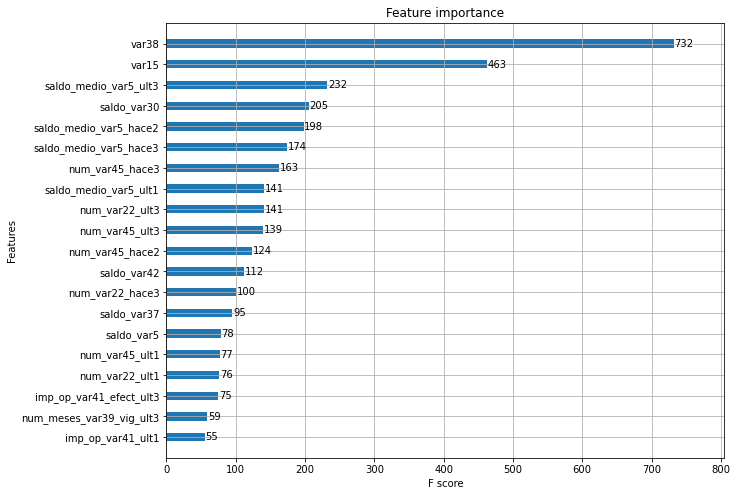

In [25]:
from xgboost import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)